In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

In [13]:

%matplotlib inline

In [14]:
cd /Users/xpandachuy/Projects/kaggle/EEG_Detection_Grasp_Lift/

/Users/xpandachuy/Projects/kaggle/EEG_Detection_Grasp_Lift


In [15]:
series = pd.read_csv('train/subj4_series1_data.csv', index_col=0)
print(series.head())

                 Fp1  Fp2    F7   F3   Fz   F4   F8  FC5  FC1  FC2  ...    P7  \
id                                                                  ...         
subj4_series1_0  708  885  1053  592  327  637  738  906   51  495  ...   893   
subj4_series1_1  779  797  1061  538  364  716  736  930   60  513  ...   938   
subj4_series1_2  819  797  1131  559  346  685  730  710   53  499  ...   906   
subj4_series1_3  827  818  1138  507  285  620  747  732   23  468  ...   846   
subj4_series1_4  851  875  1185  493  296  636  754  848   31  488  ...   869   

                  P3   Pz   P4   P8  PO9   O1   Oz   O2  PO10  
id                                                             
subj4_series1_0  333  213  450  657  417  521  372  308   419  
subj4_series1_1  369  226  479  665  510  552  393  324   433  
subj4_series1_2  368  252  477  704  567  539  419  332   410  
subj4_series1_3  305  192  449  695  505  503  368  284   382  
subj4_series1_4  332  216  467  693  531  540  3

In [16]:
events = pd.read_csv('train/subj4_series1_events.csv', index_col=0)
print(events.head())

                 HandStart  FirstDigitTouch  BothStartLoadPhase  LiftOff  \
id                                                                         
subj4_series1_0          0                0                   0        0   
subj4_series1_1          0                0                   0        0   
subj4_series1_2          0                0                   0        0   
subj4_series1_3          0                0                   0        0   
subj4_series1_4          0                0                   0        0   

                 Replace  BothReleased  
id                                      
subj4_series1_0        0             0  
subj4_series1_1        0             0  
subj4_series1_2        0             0  
subj4_series1_3        0             0  
subj4_series1_4        0             0  


In [17]:
# are there overlapping classes?
sum_events = events.sum(axis=1)

# if a row in the events data frame has sum greater than one,
# it means that more than one action is recorded at the same time
print("Number of rows where two events are happen simultaneously:", len(sum_events[sum_events == 2]))
print("Number of rows where three events are happen simultaneously:", len(sum_events[sum_events == 3]))
print("Number of rows where four events are happen simultaneously:", len(sum_events[sum_events == 4]))

Number of rows where two events are happen simultaneously: 5462
Number of rows where three events are happen simultaneously: 723
Number of rows where four events are happen simultaneously: 0


In [18]:
# let's convert the events data frame to a single vector of events
# the encoding is the following
# 0: no action occurrs
# 1: HandStart
# 2: FirstDigitTouch
# 3: BothStartLoadPhase
# 4: LiftOff
# 5: Replace
# 6: BothReleased
# NOTE: What do we do with the overlapping classes?
# For now, I'm just going to take the first label
# For example, if 'BothStartLoadPhase' and 'Replace' are both 1 in one row,
# the row looks like [0, 0, 0, 1, 1, 0], but I will say that the label for
# the row is just 3 (BothStartLoadPhase)
num_samples = len(events)
labels = np.zeros(num_samples) # start with an array of all zeros
non_zero = np.any(events.values > 0, axis=1) # get a Boolean array indicating which rows have at least one 1
# the class label is the one plus the index of the first occurrence of 1
labels[non_zero] = (np.argmax(events.values, axis=1)[non_zero] + 1) 

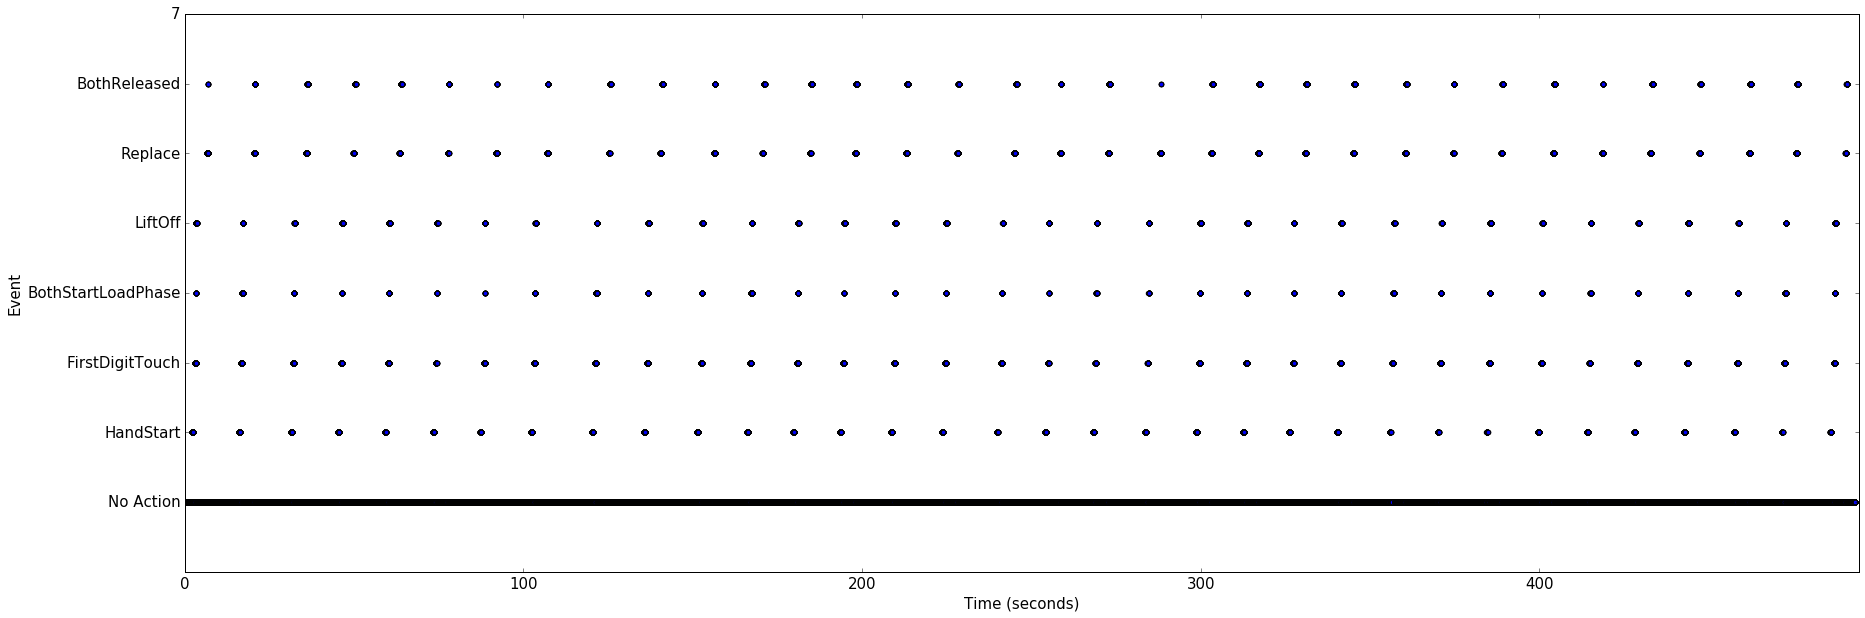

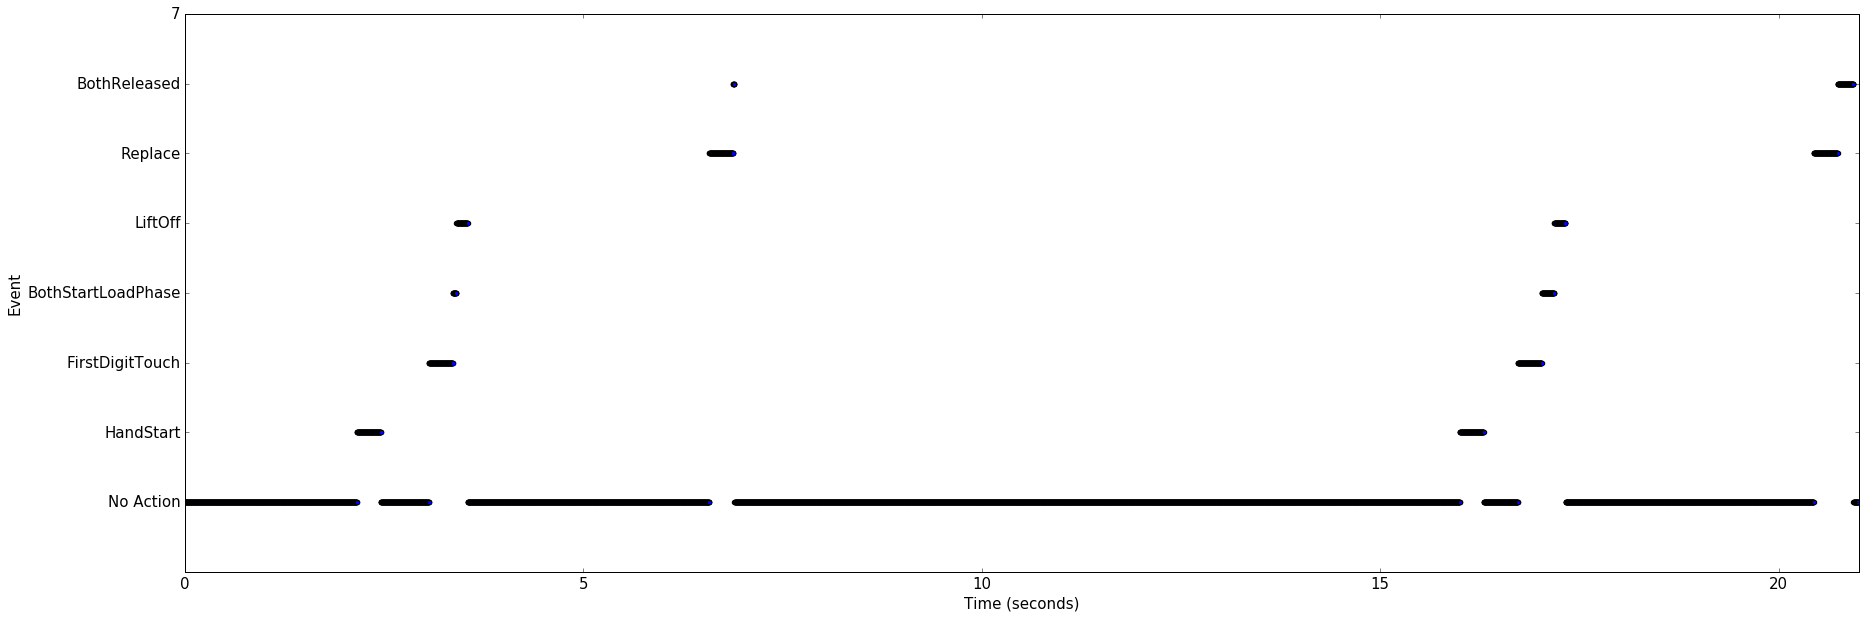

In [19]:
# OK. Let's plot it
sampling_rate = 500.
# prepare the x-axis. We divide by the sampling rate to get time in seconds
x_axis = np.arange(num_samples) / sampling_rate

# make font bigger
matplotlib.rcParams.update({'font.size': 15})

# full time series
fig = plt.gcf()
fig.set_size_inches((30, 10))
plt.scatter(x_axis, labels)
plt.xlabel('Time (seconds)')
plt.ylabel('Event')
plt.xlim(0, x_axis[-1] + 1)
locations = range(8)
names = ["No Action", "HandStart", "FirstDigitTouch", "BothStartLoadPhase", "LiftOff", "Replace", "BothReleased", "7"]
plt.yticks(locations, names)
plt.show()
plt.close()

# the first 21 seconds
fig = plt.gcf()
fig.set_size_inches((30, 10))
plt.scatter(x_axis[:10500], labels[:10500])
plt.xlabel('Time (seconds)')
plt.ylabel('Event')
plt.yticks(locations, names)
plt.xlim(0, 21)
plt.show()
plt.close()


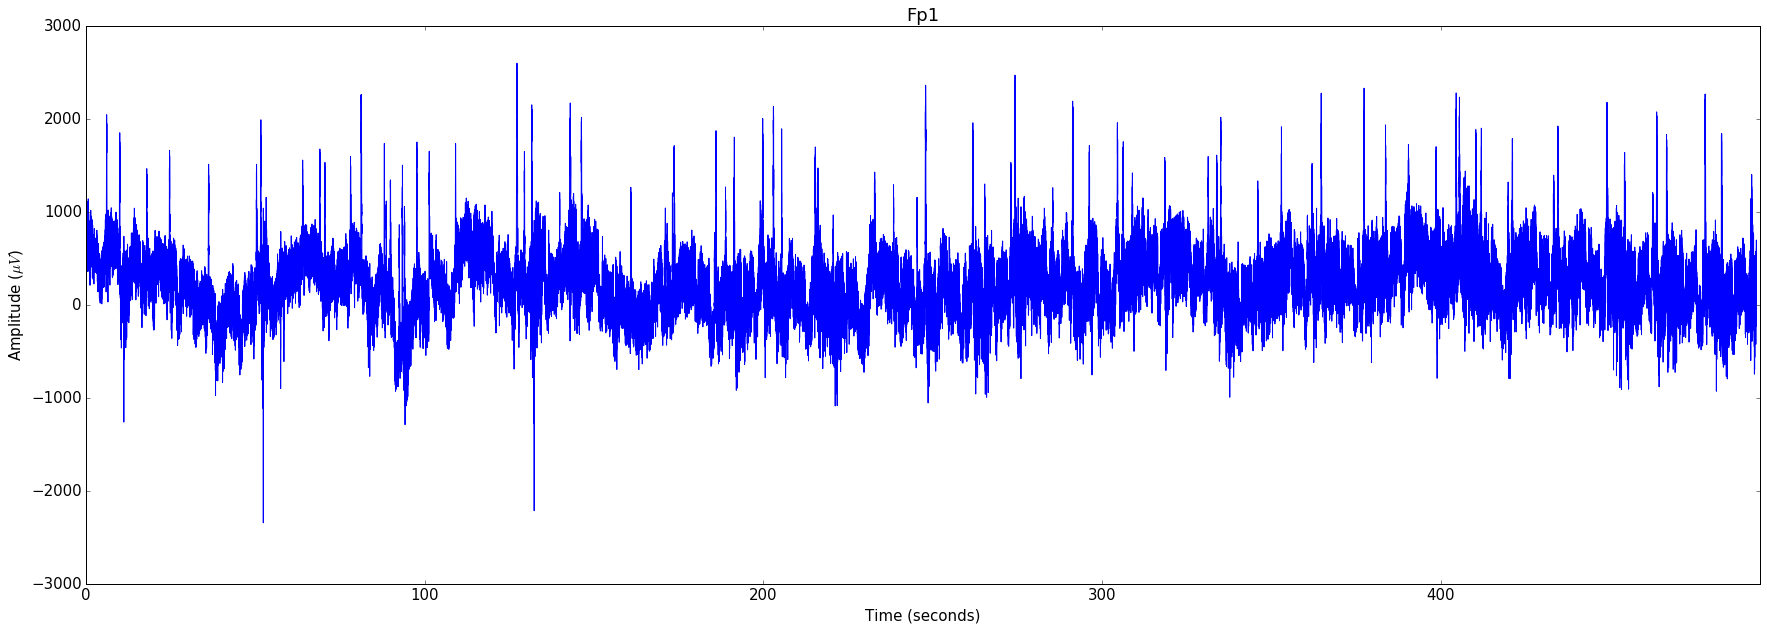

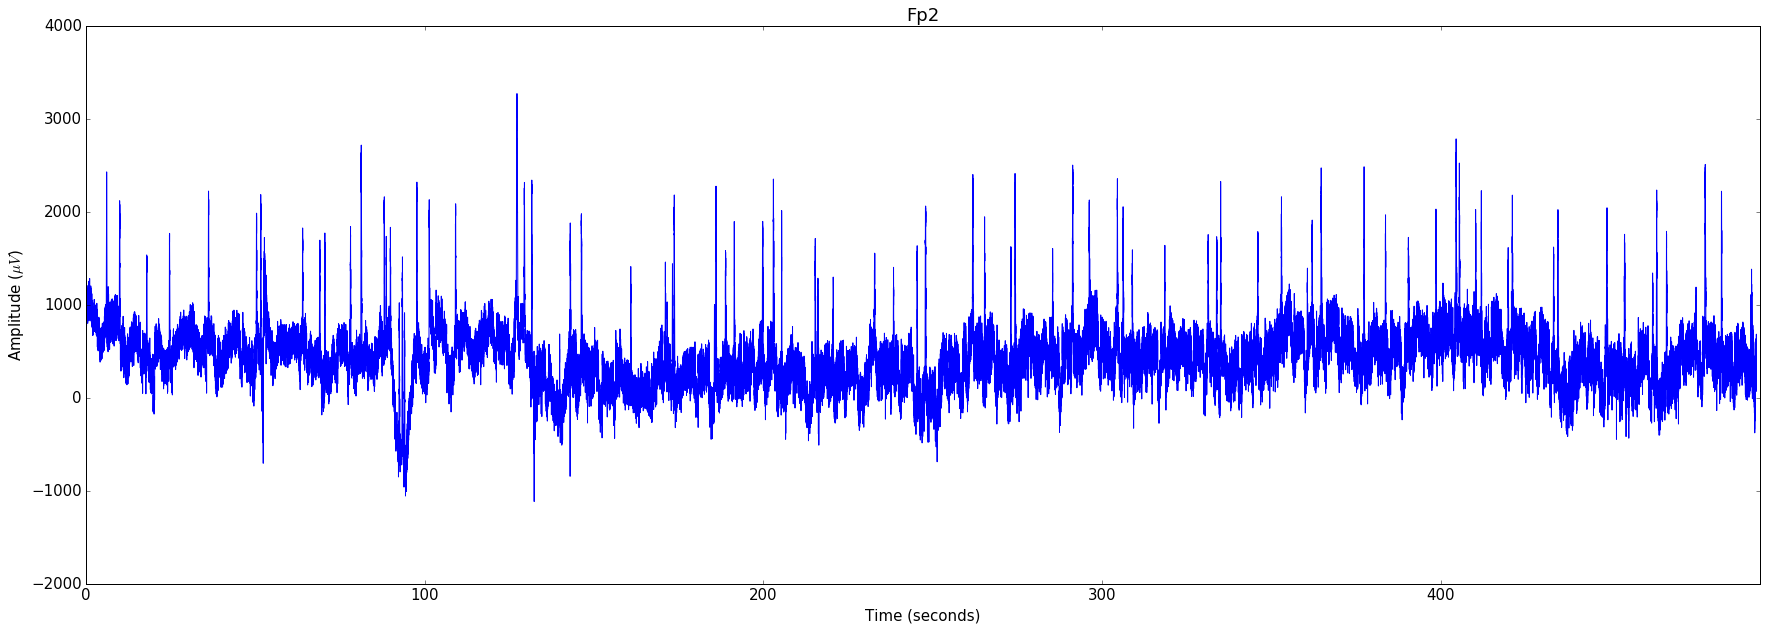

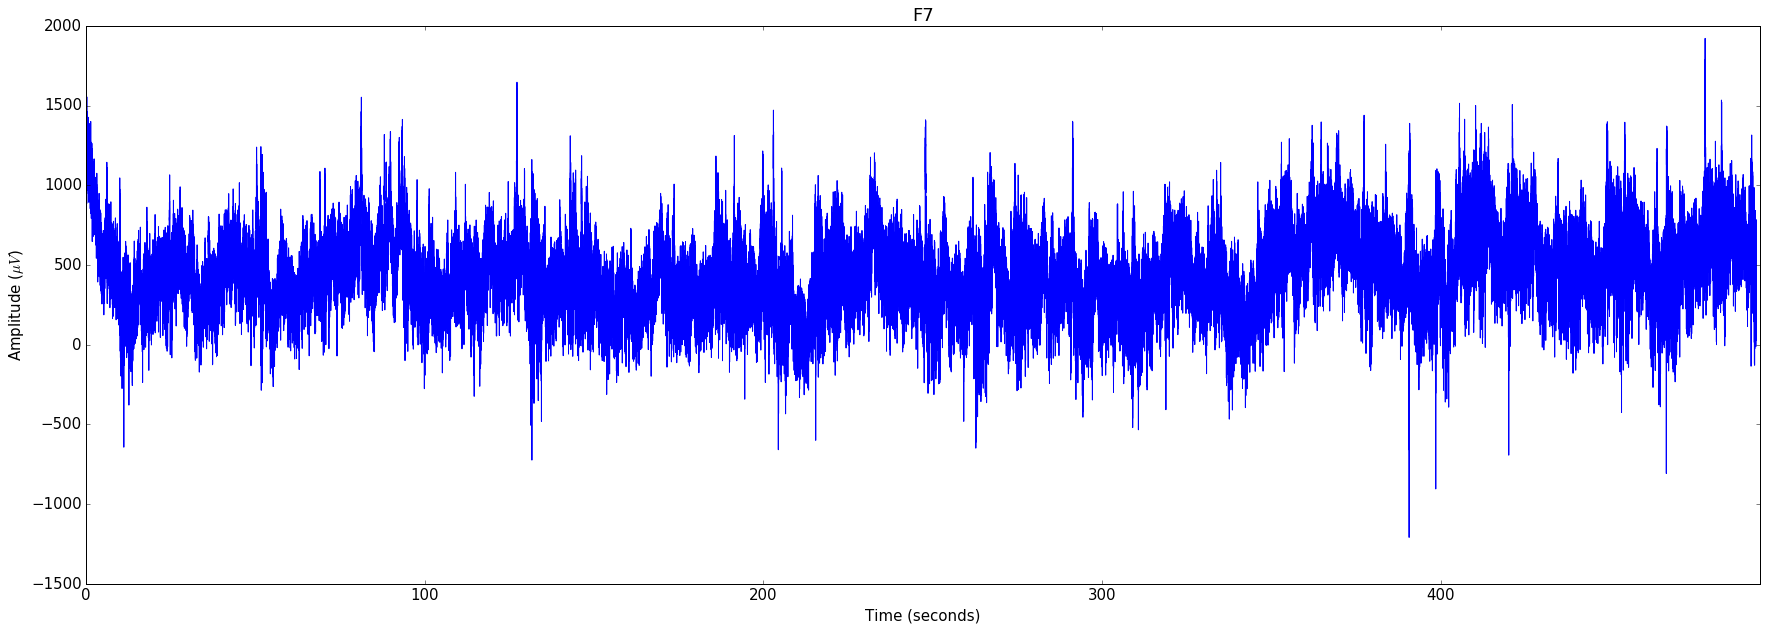

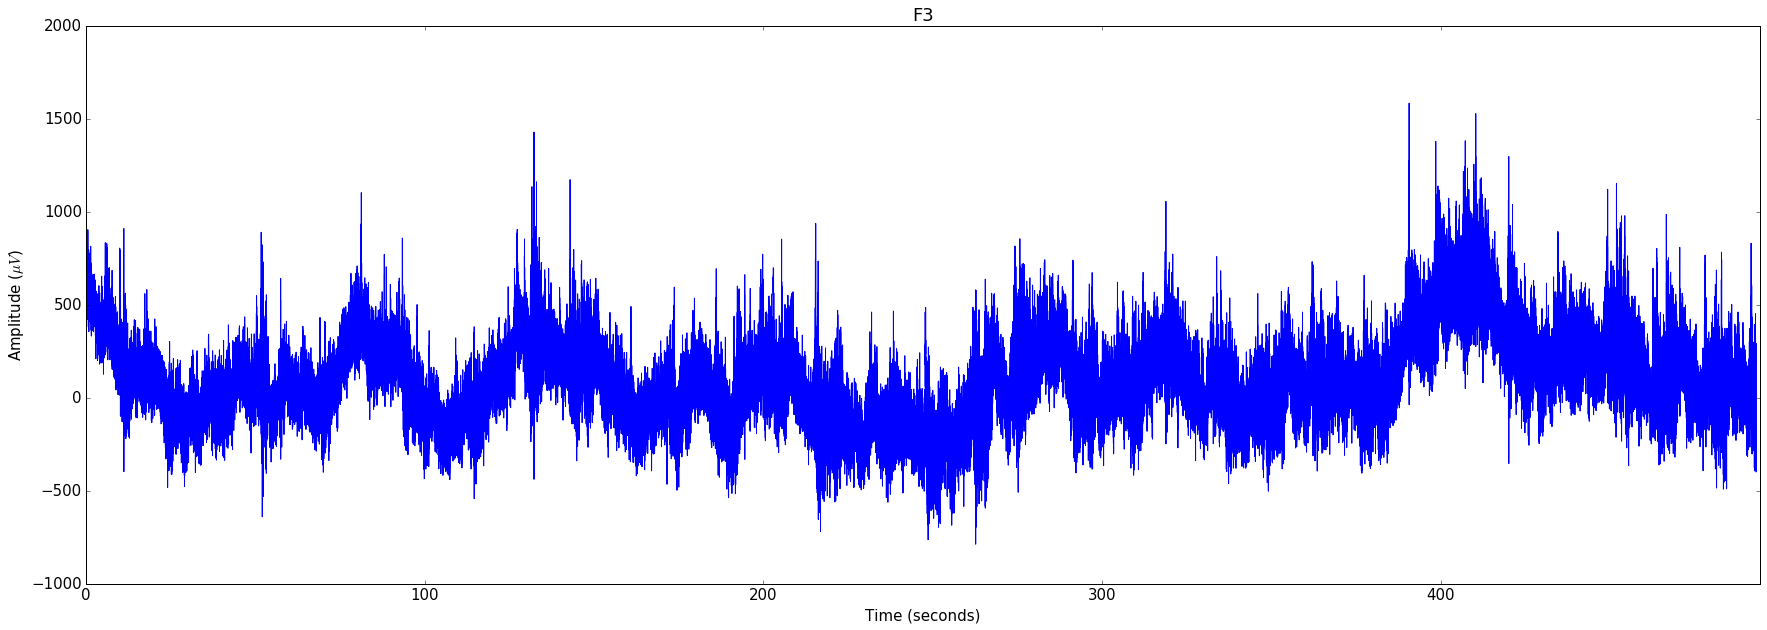

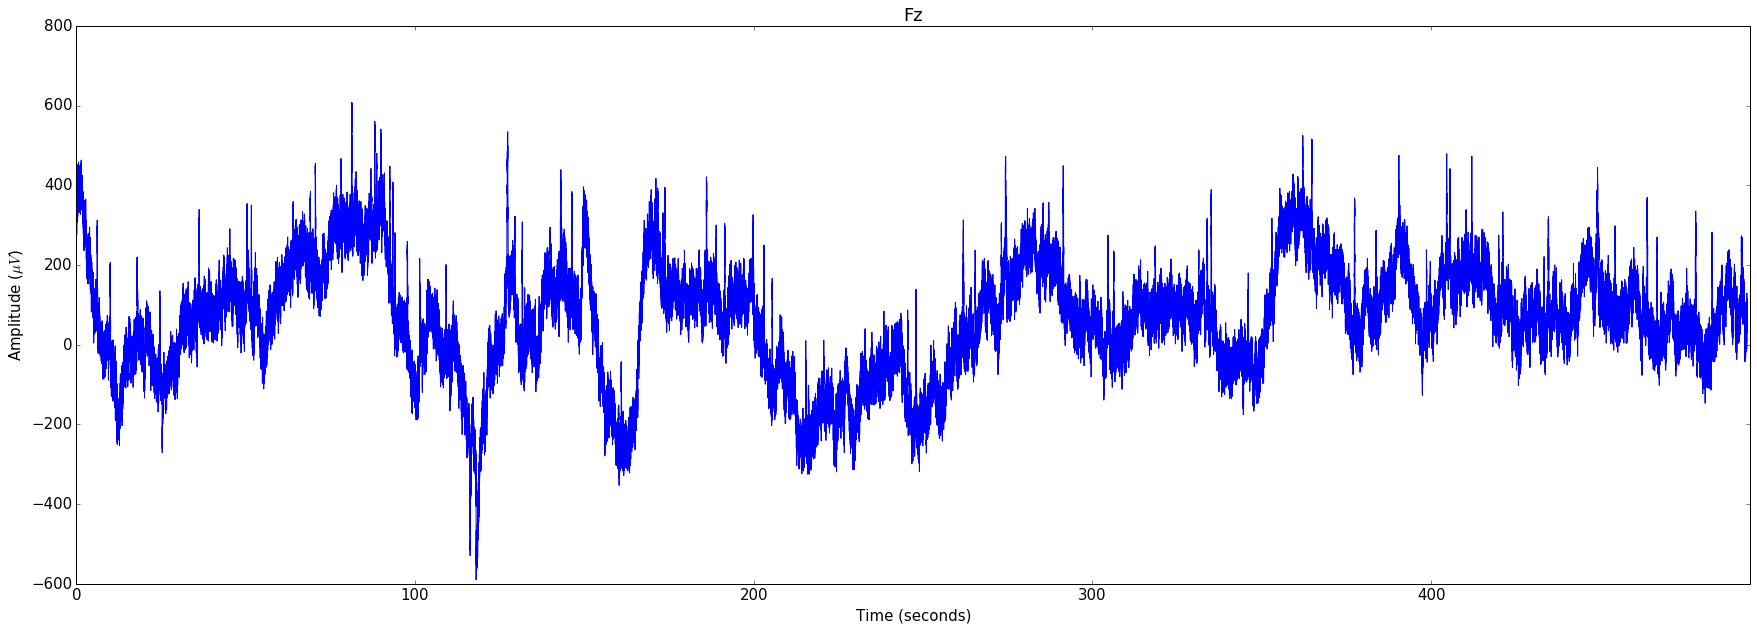

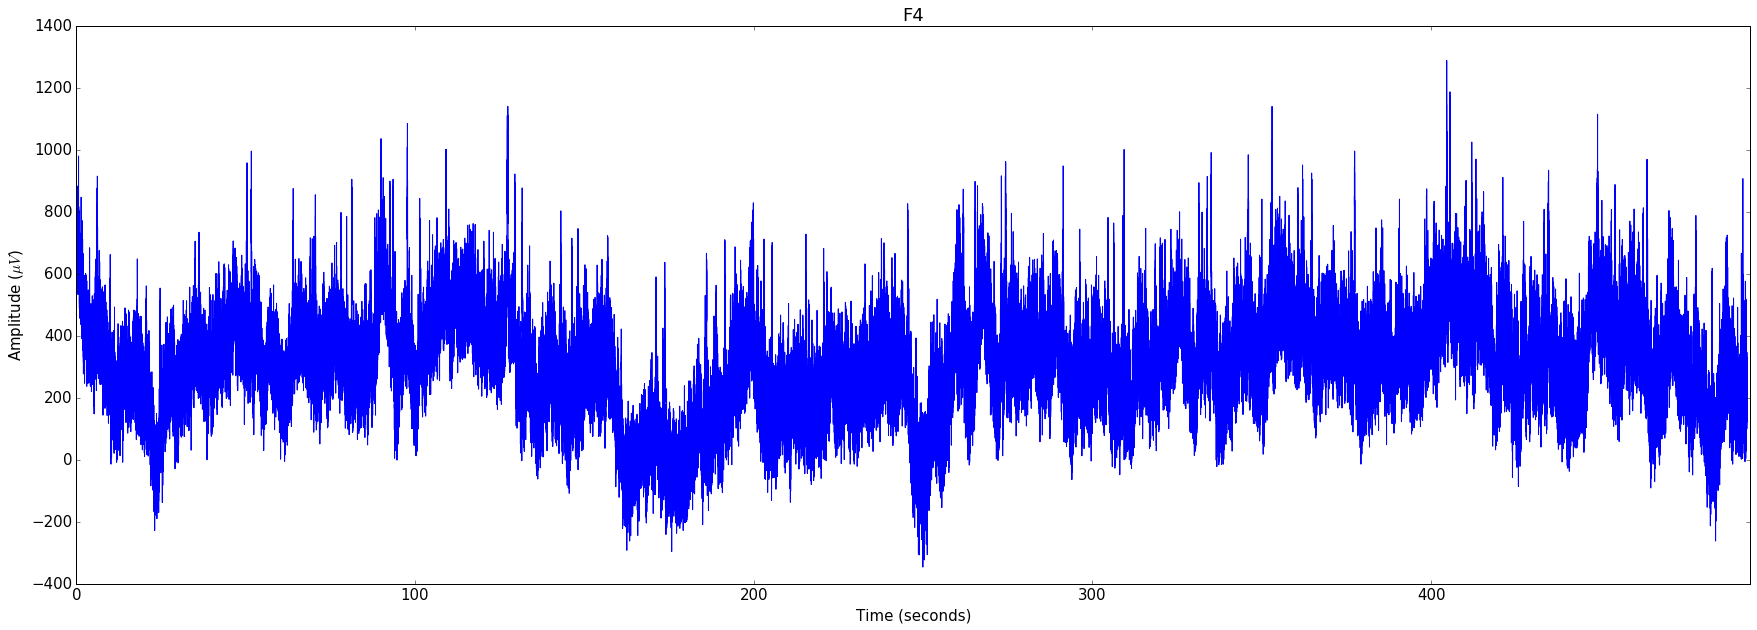

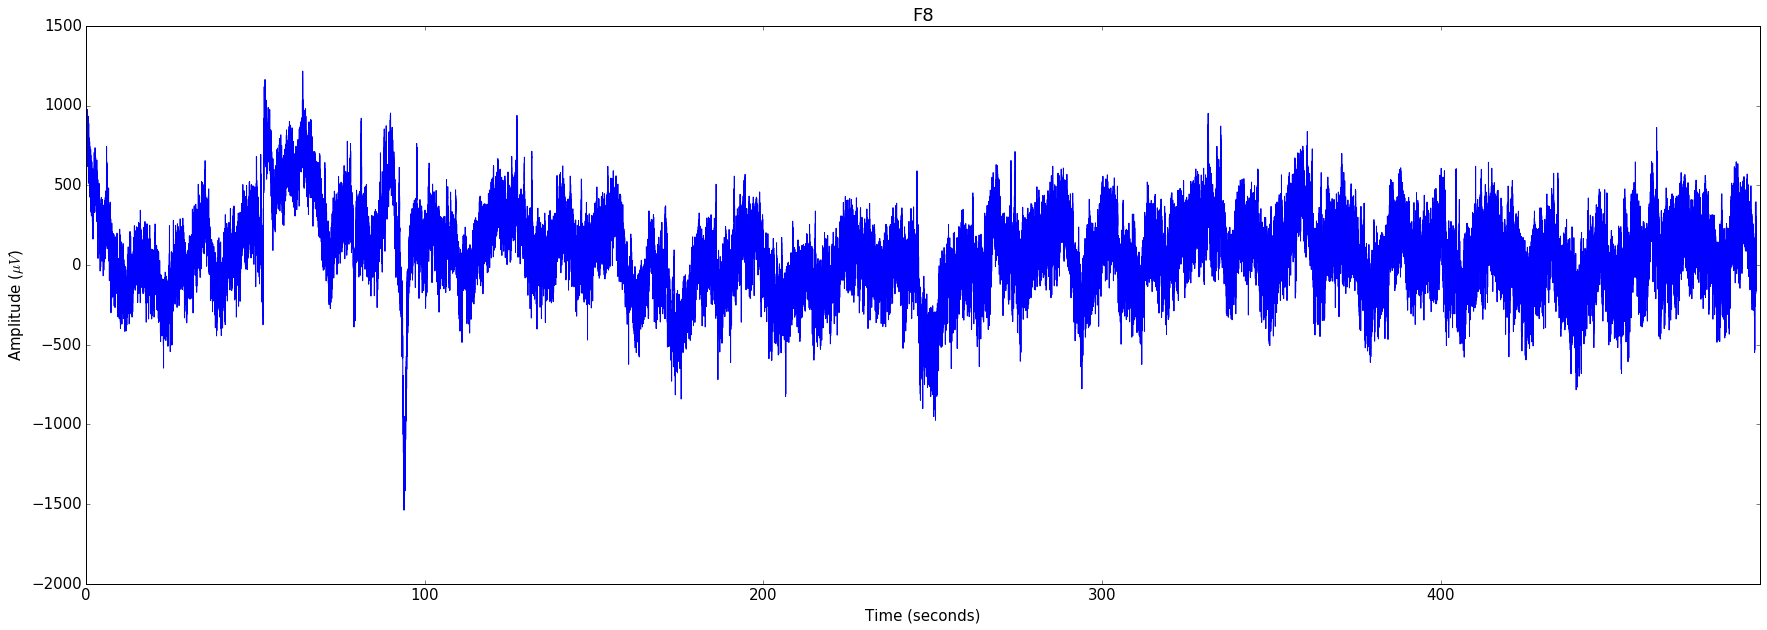

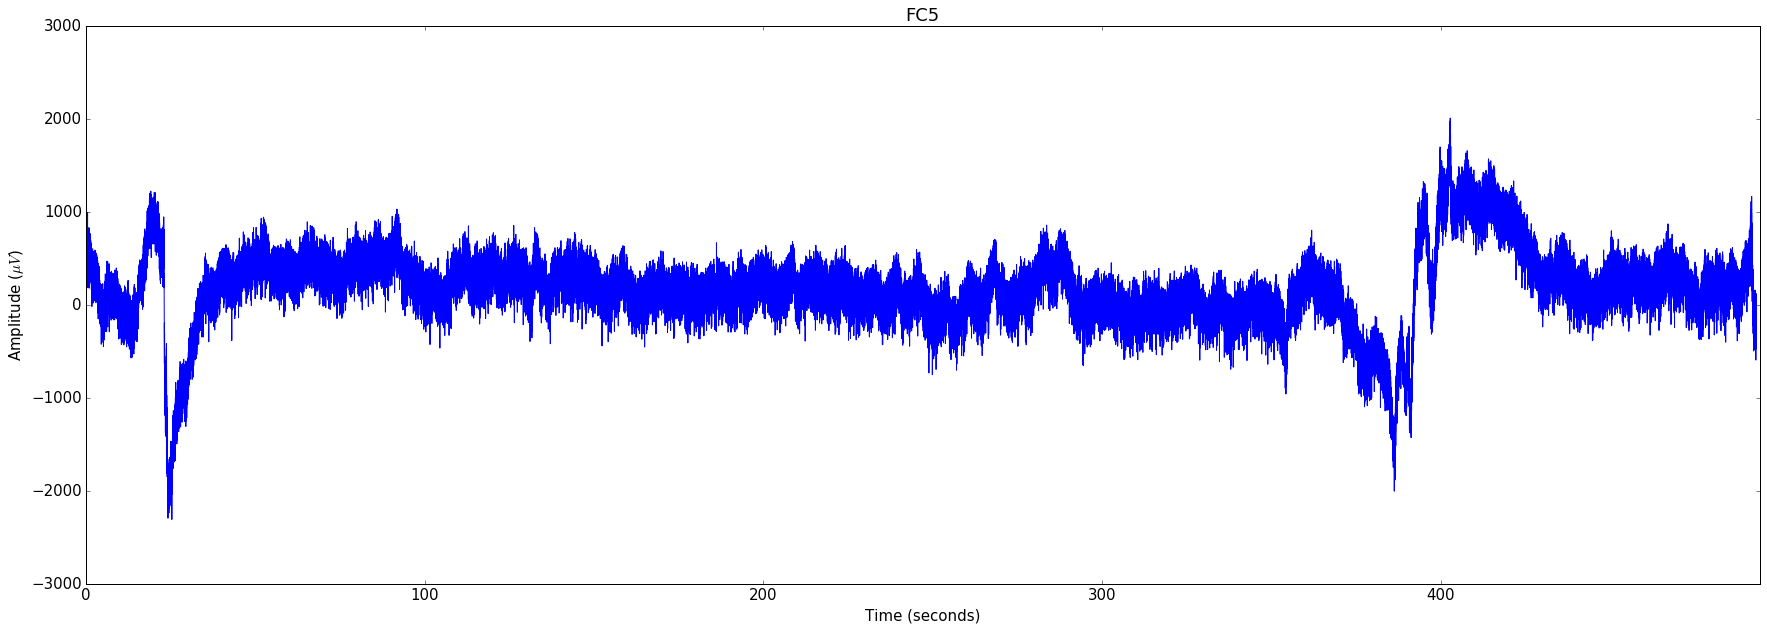

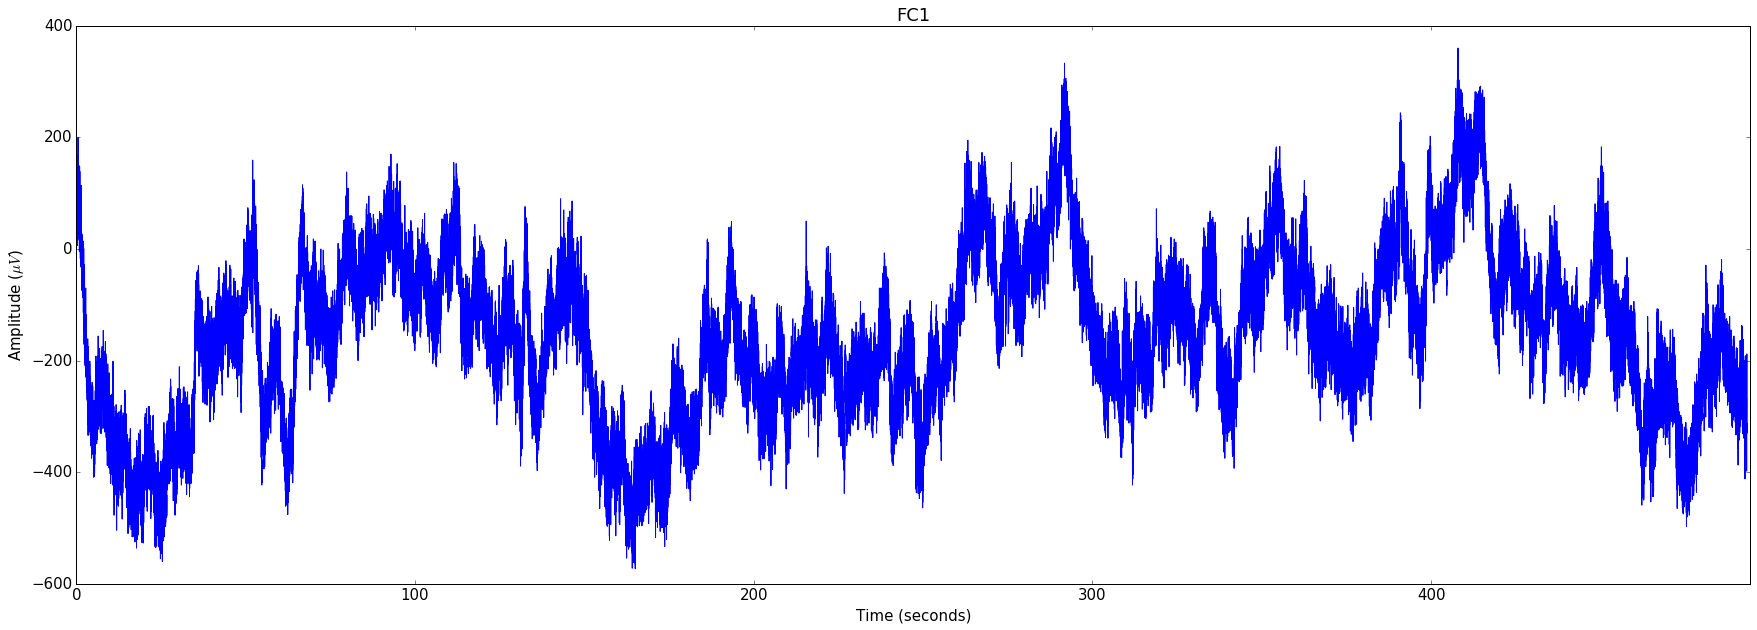

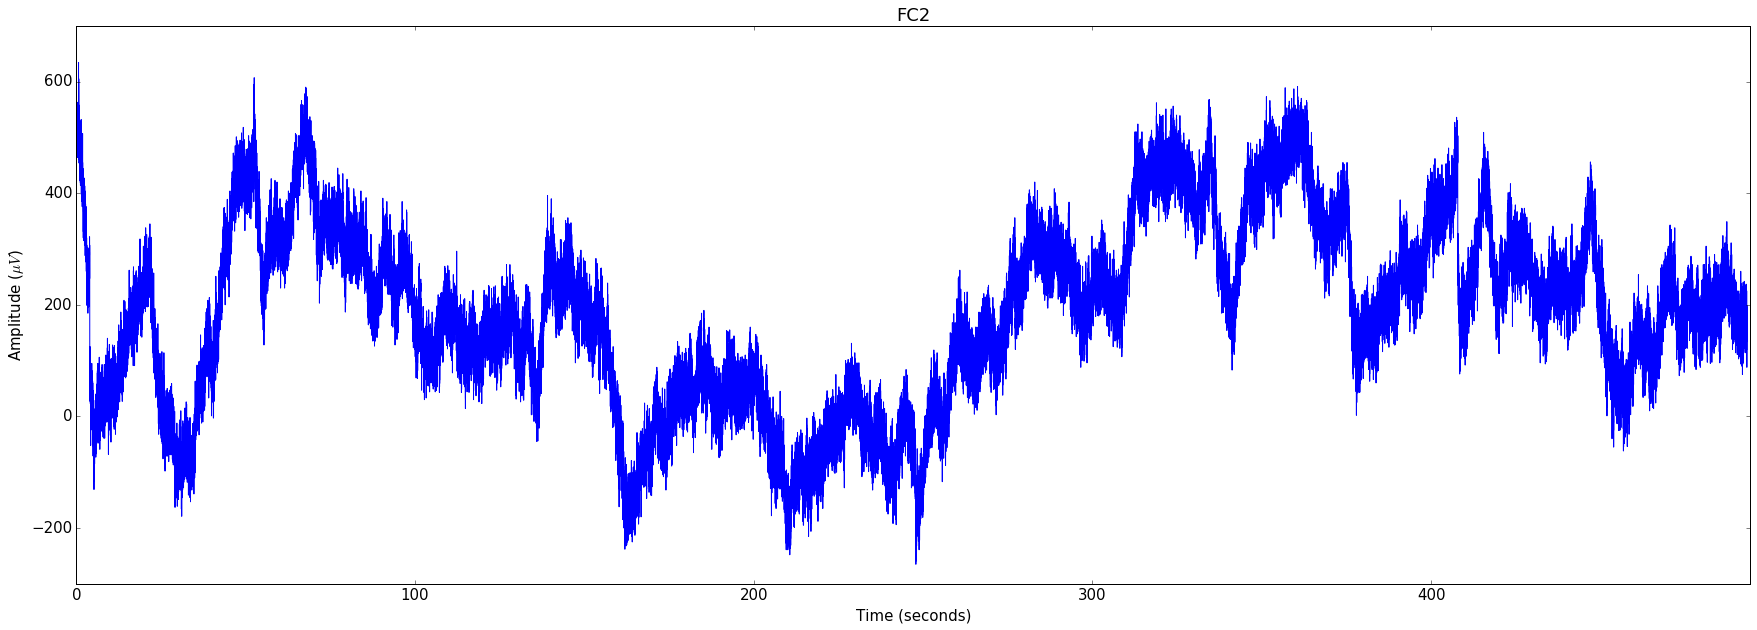

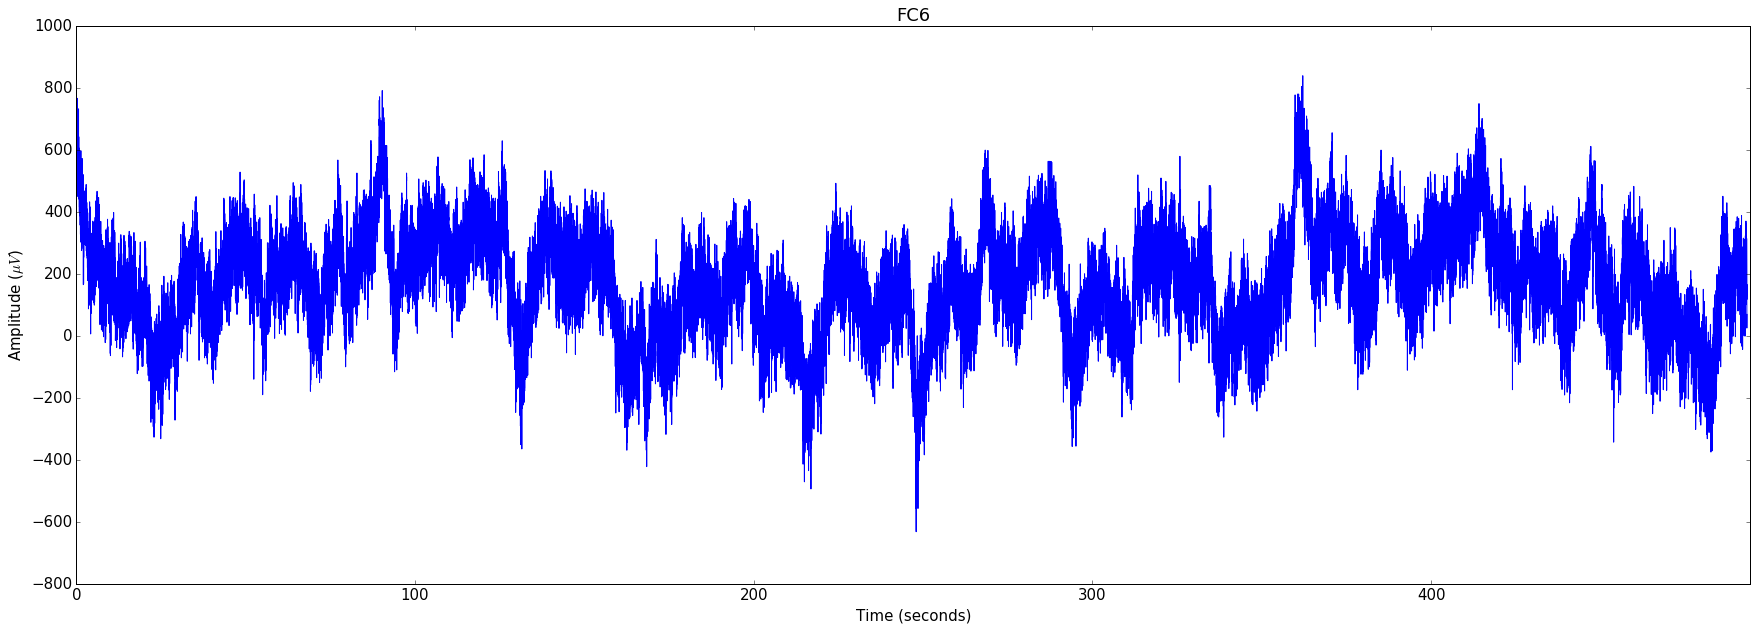

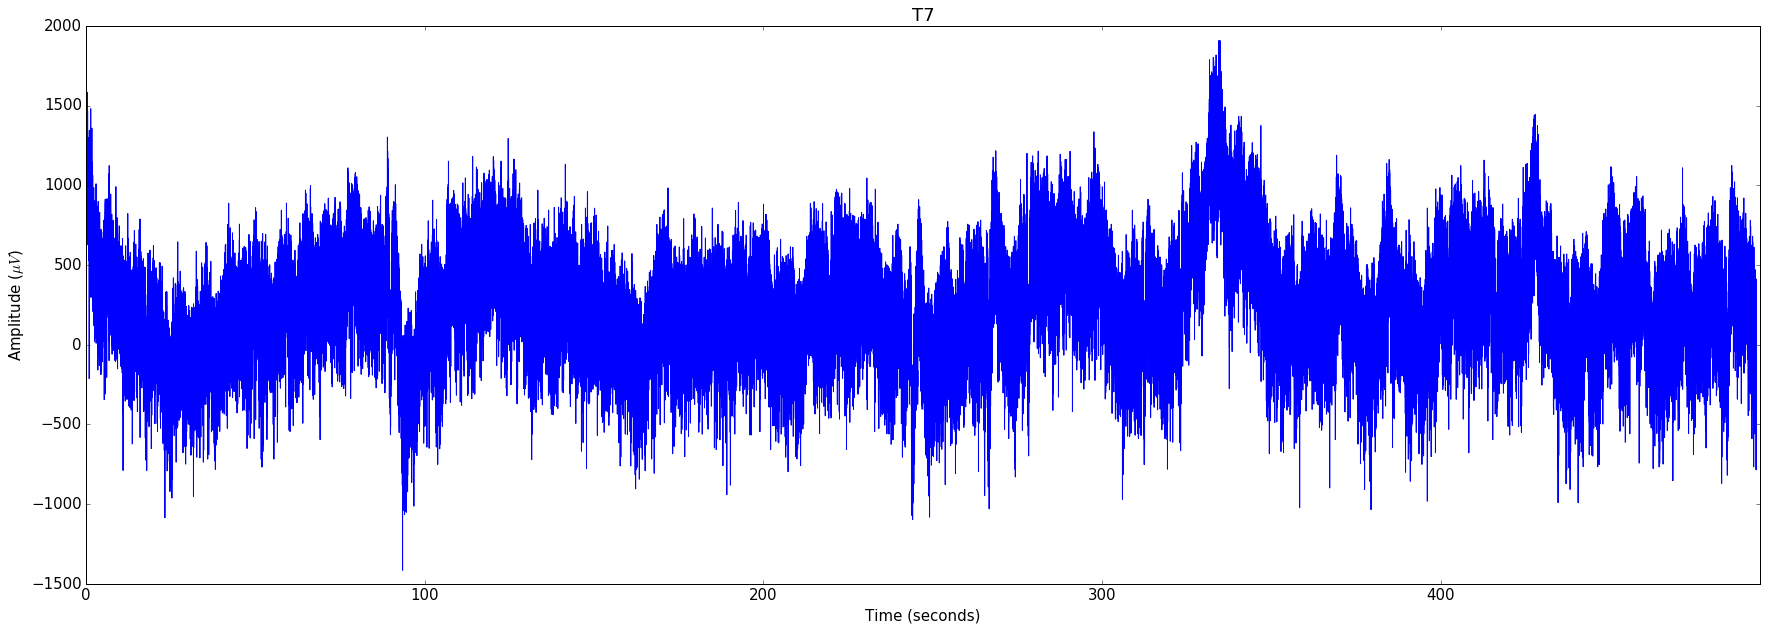

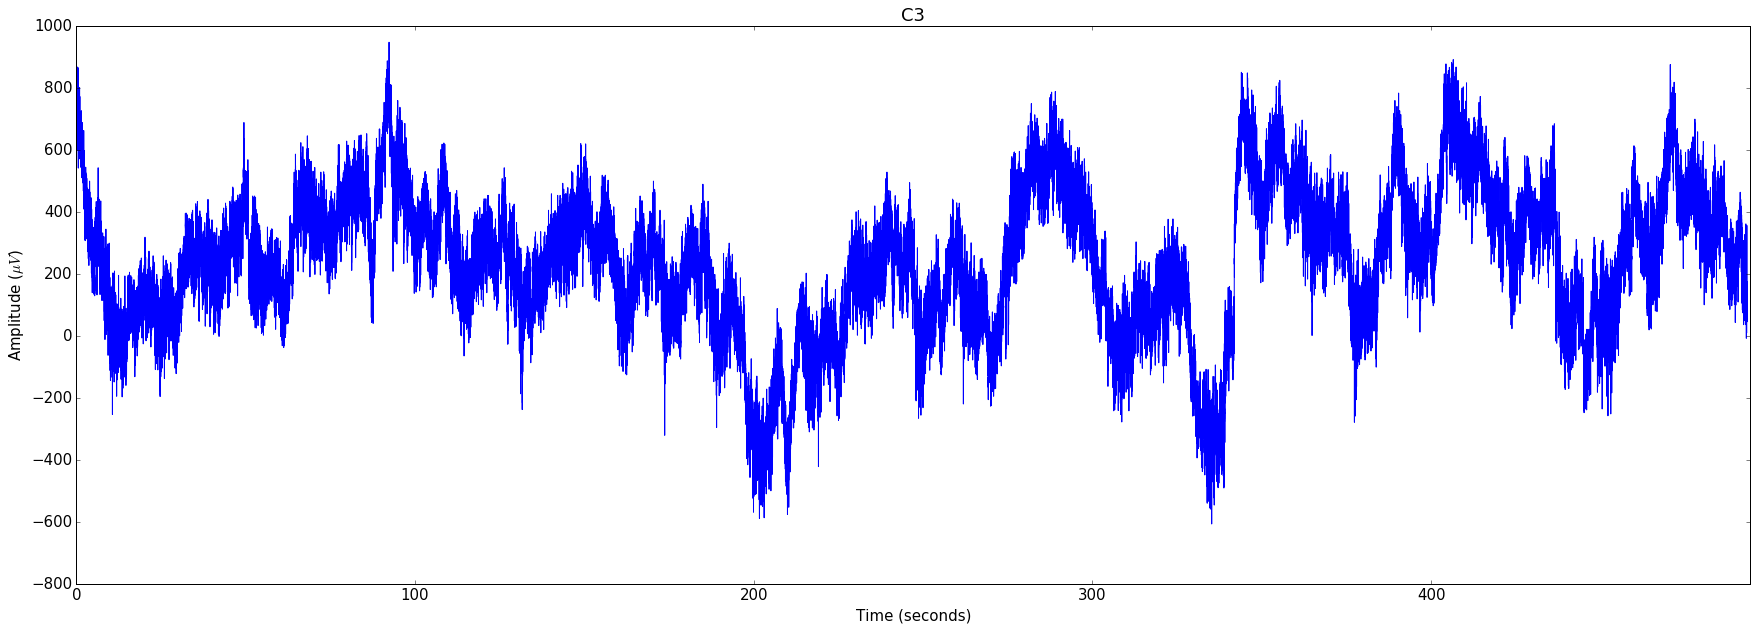

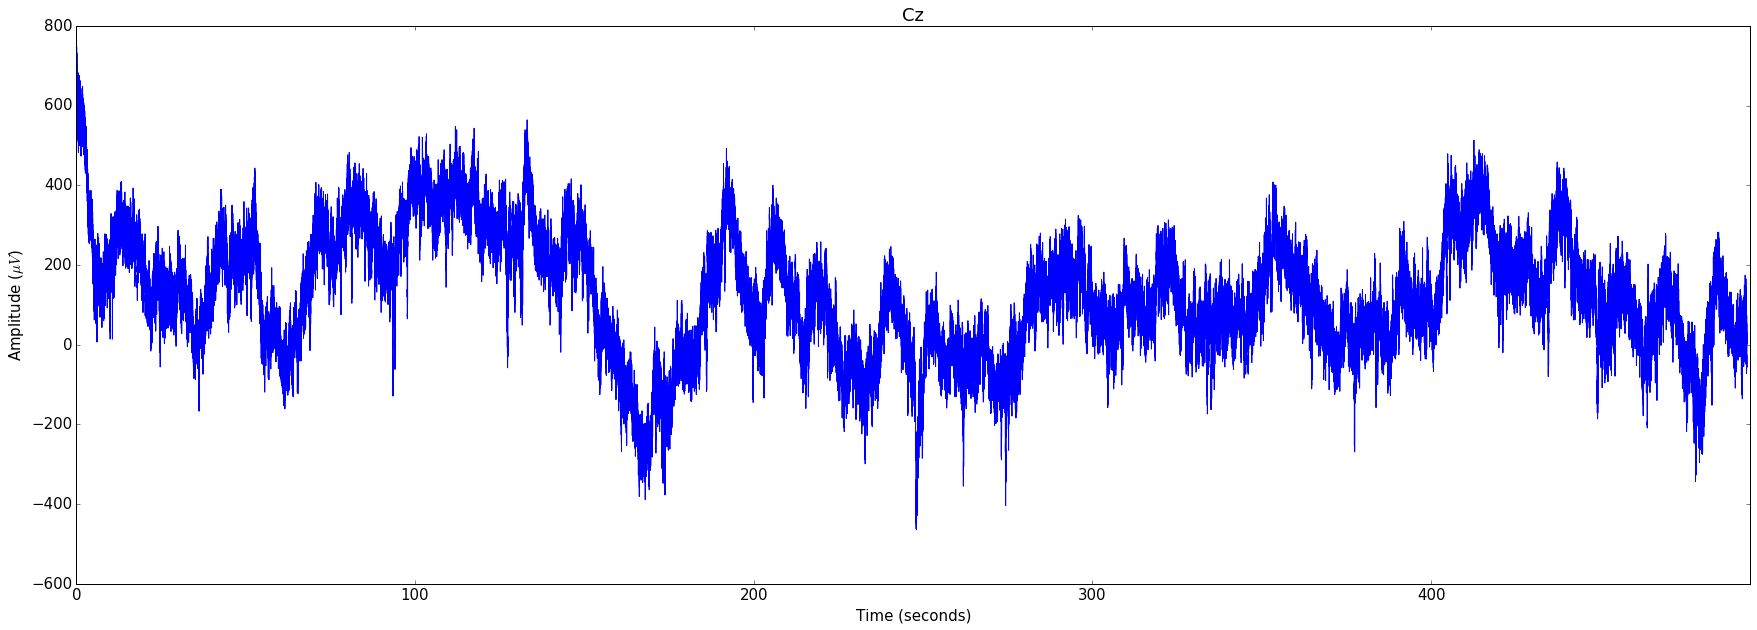

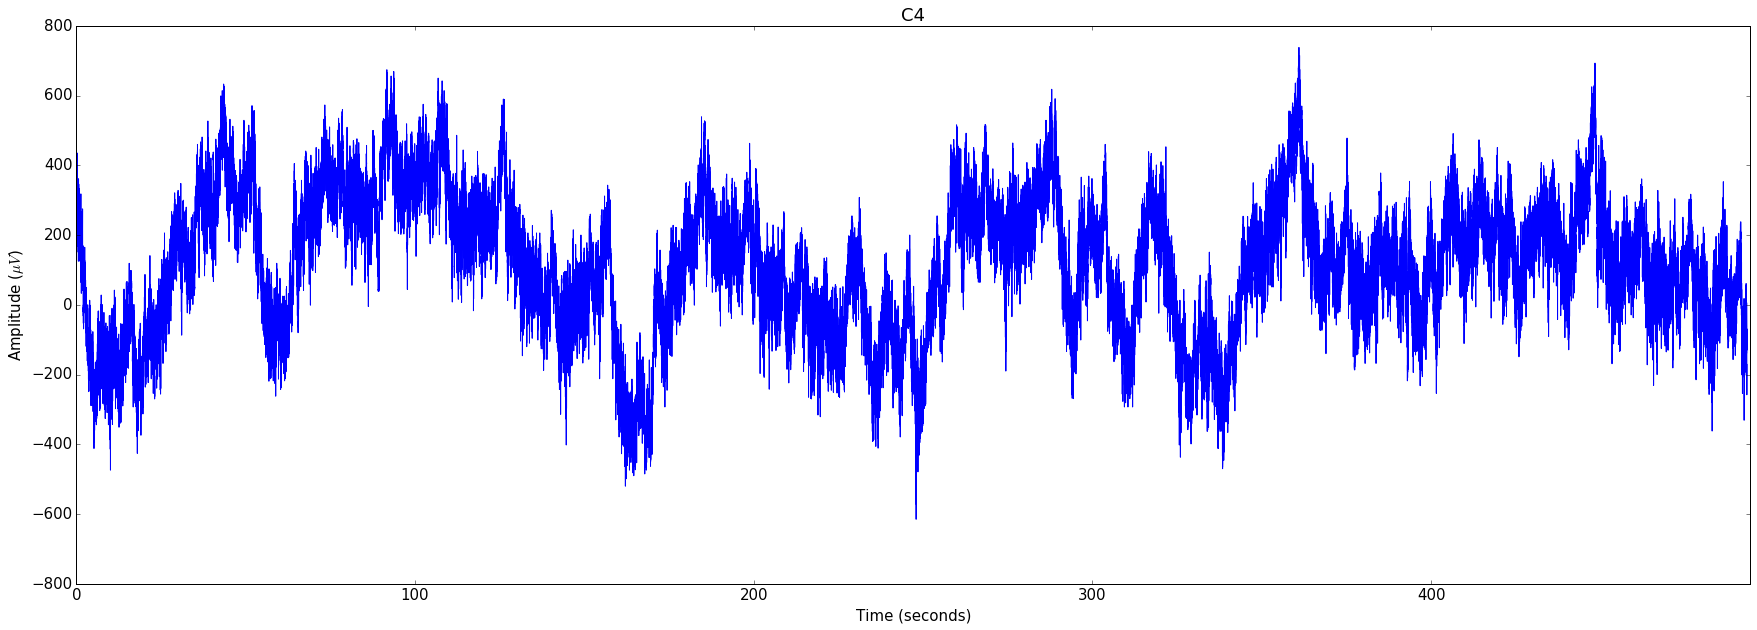

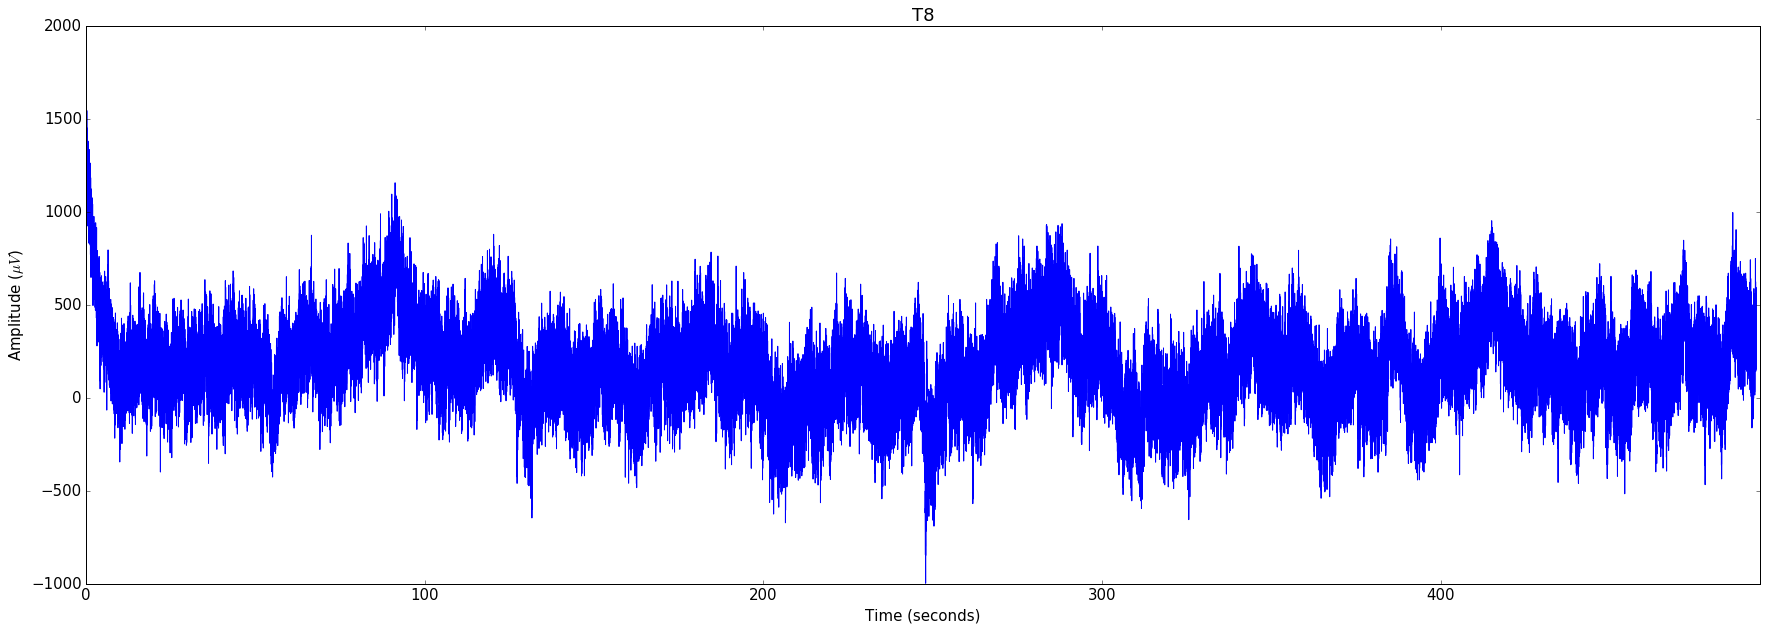

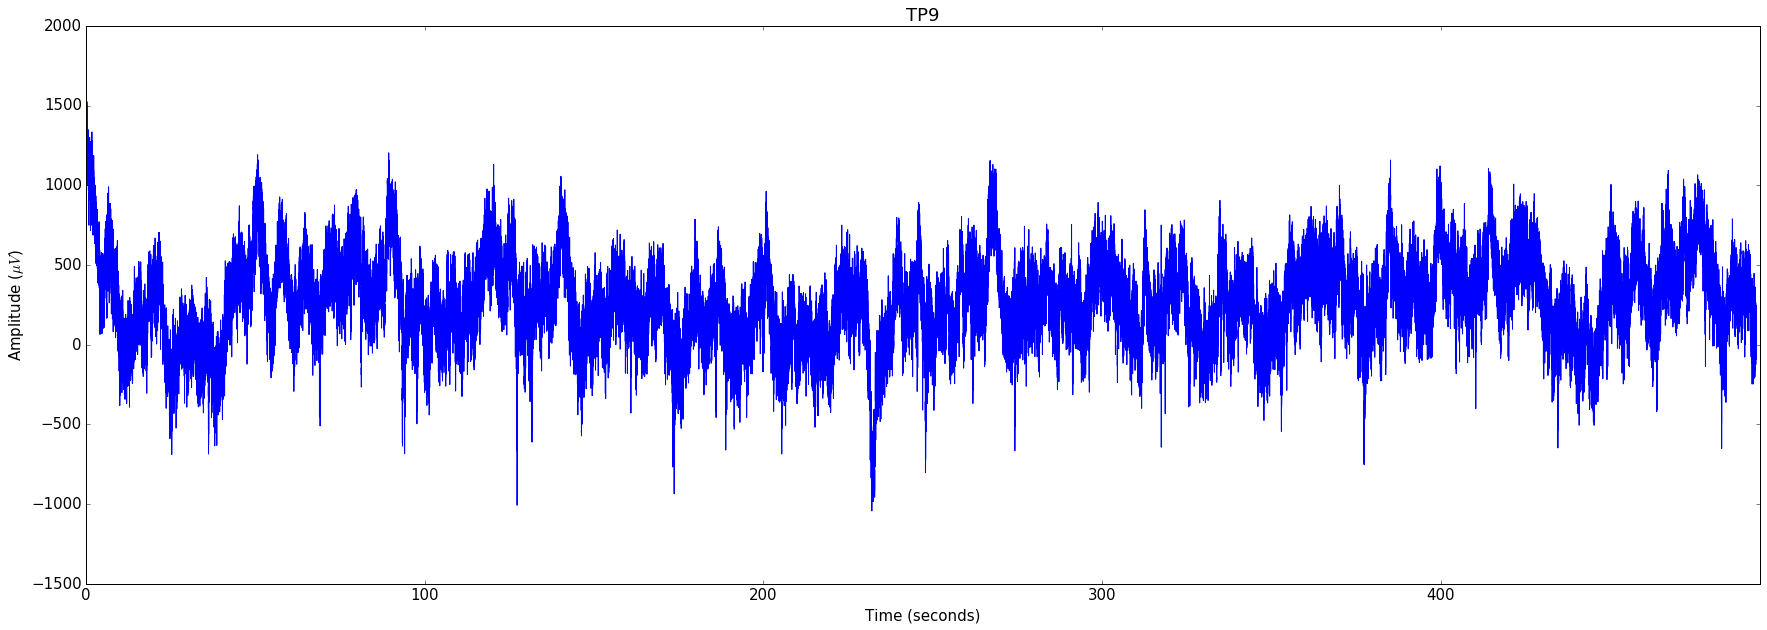

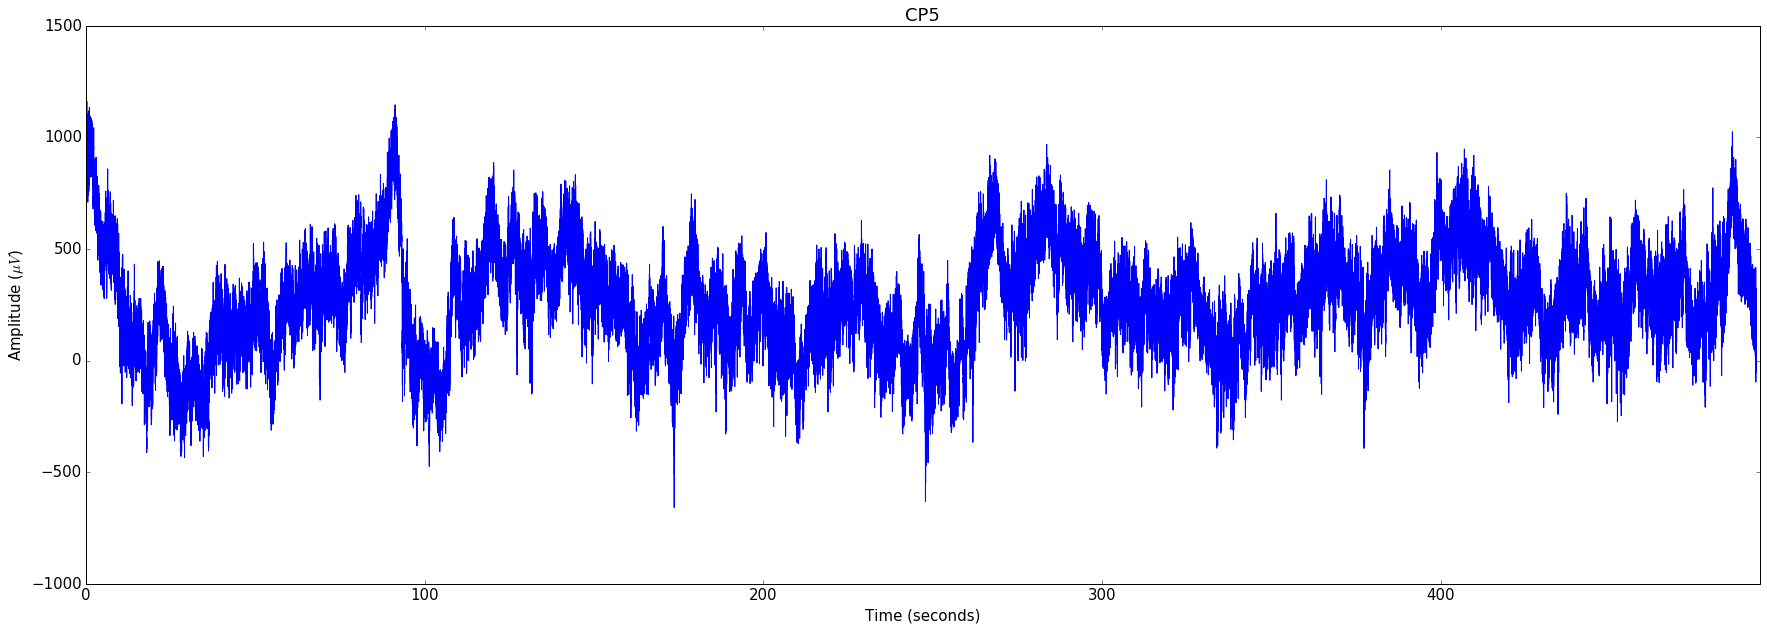

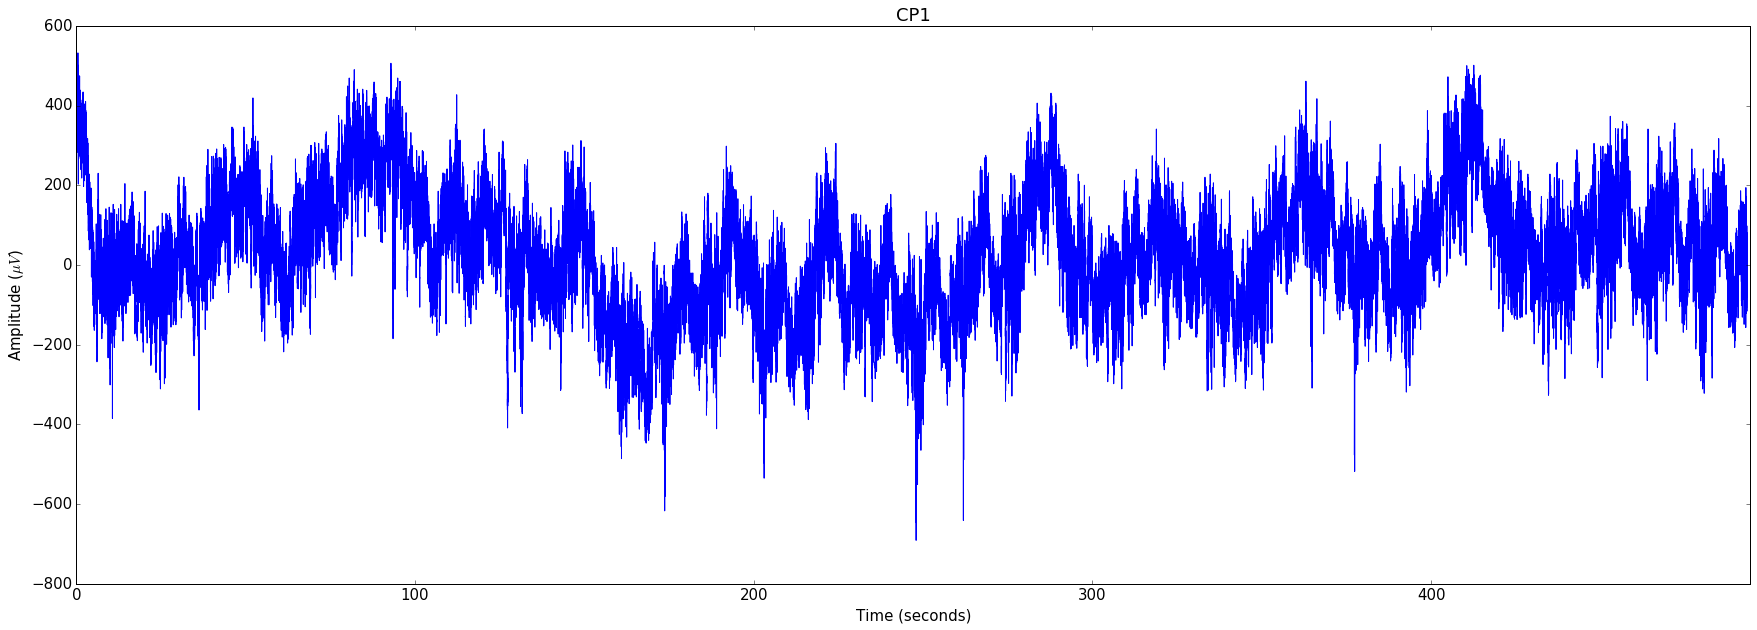

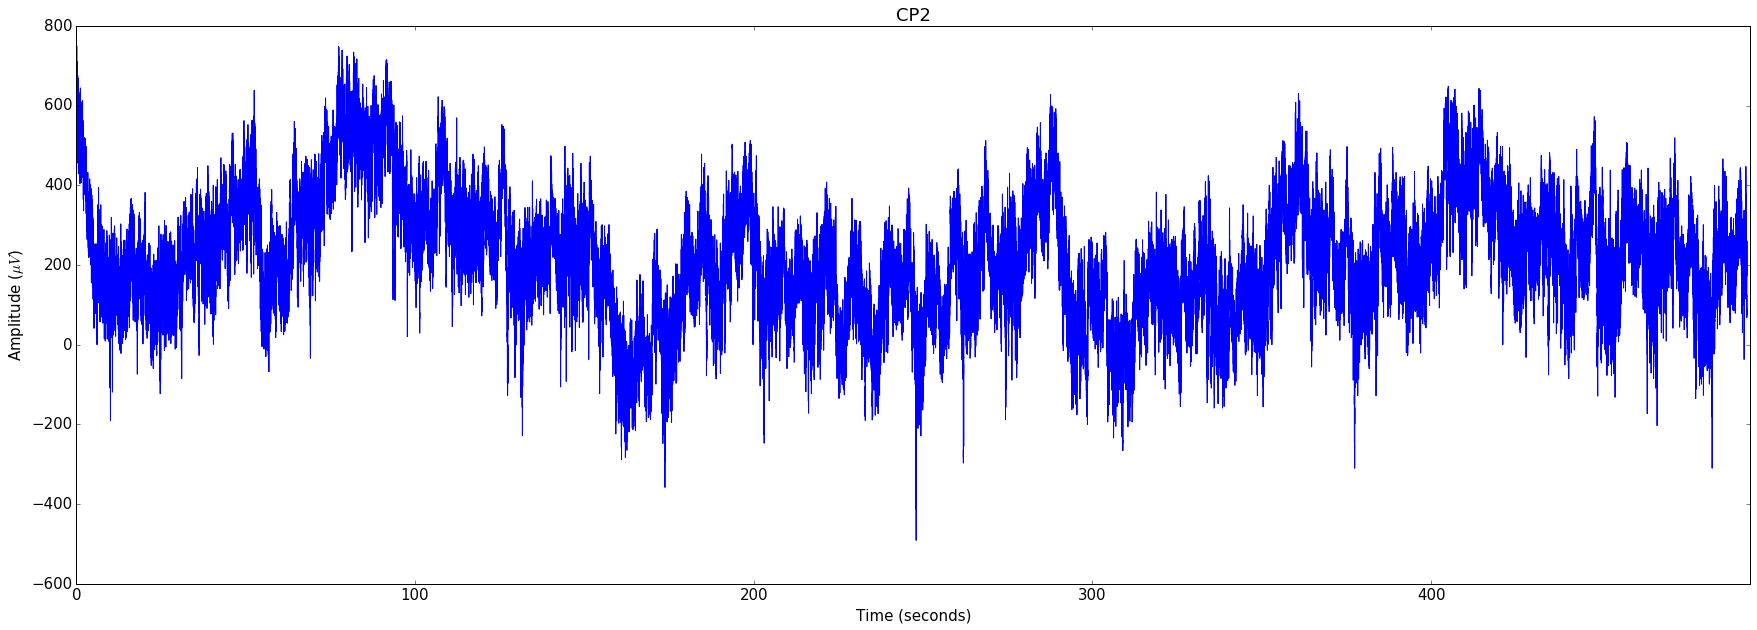

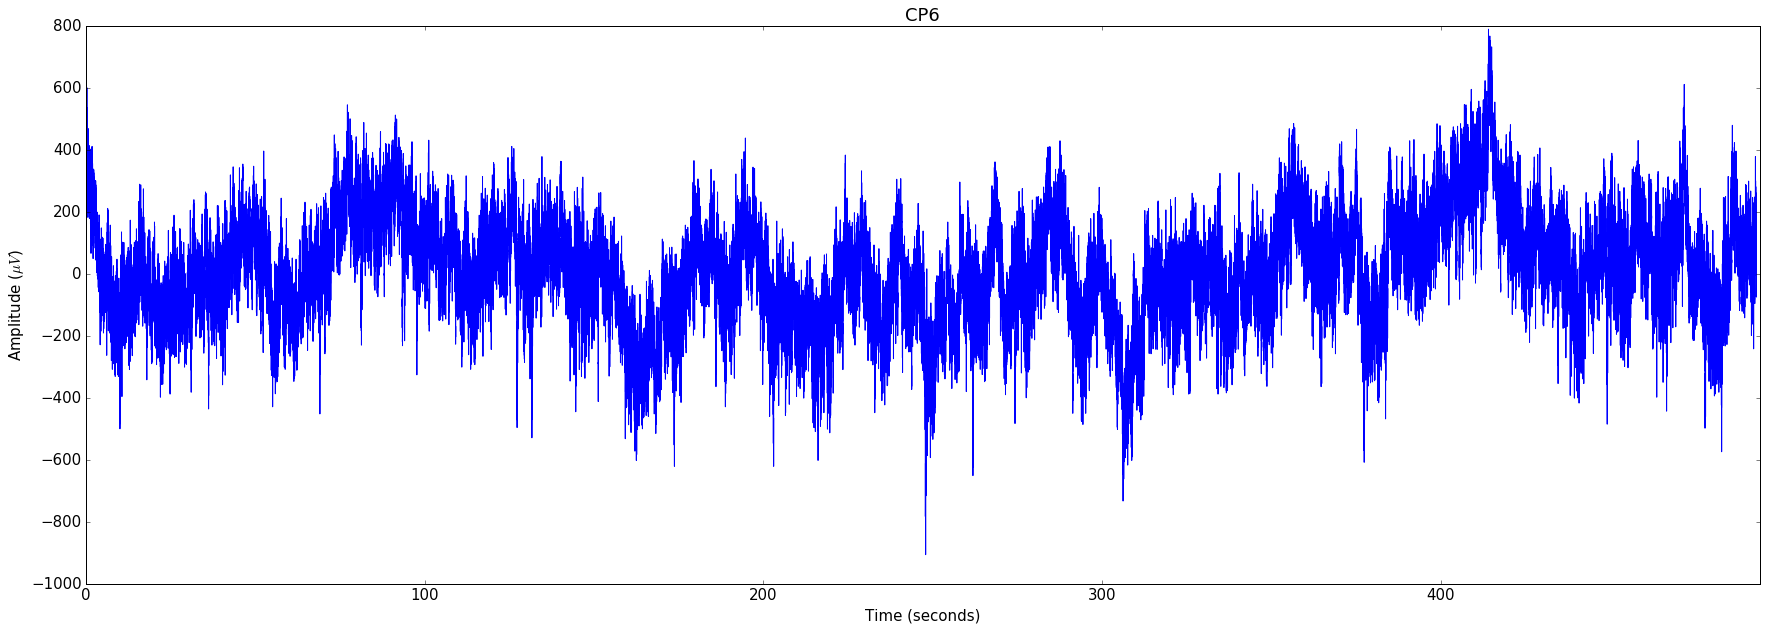

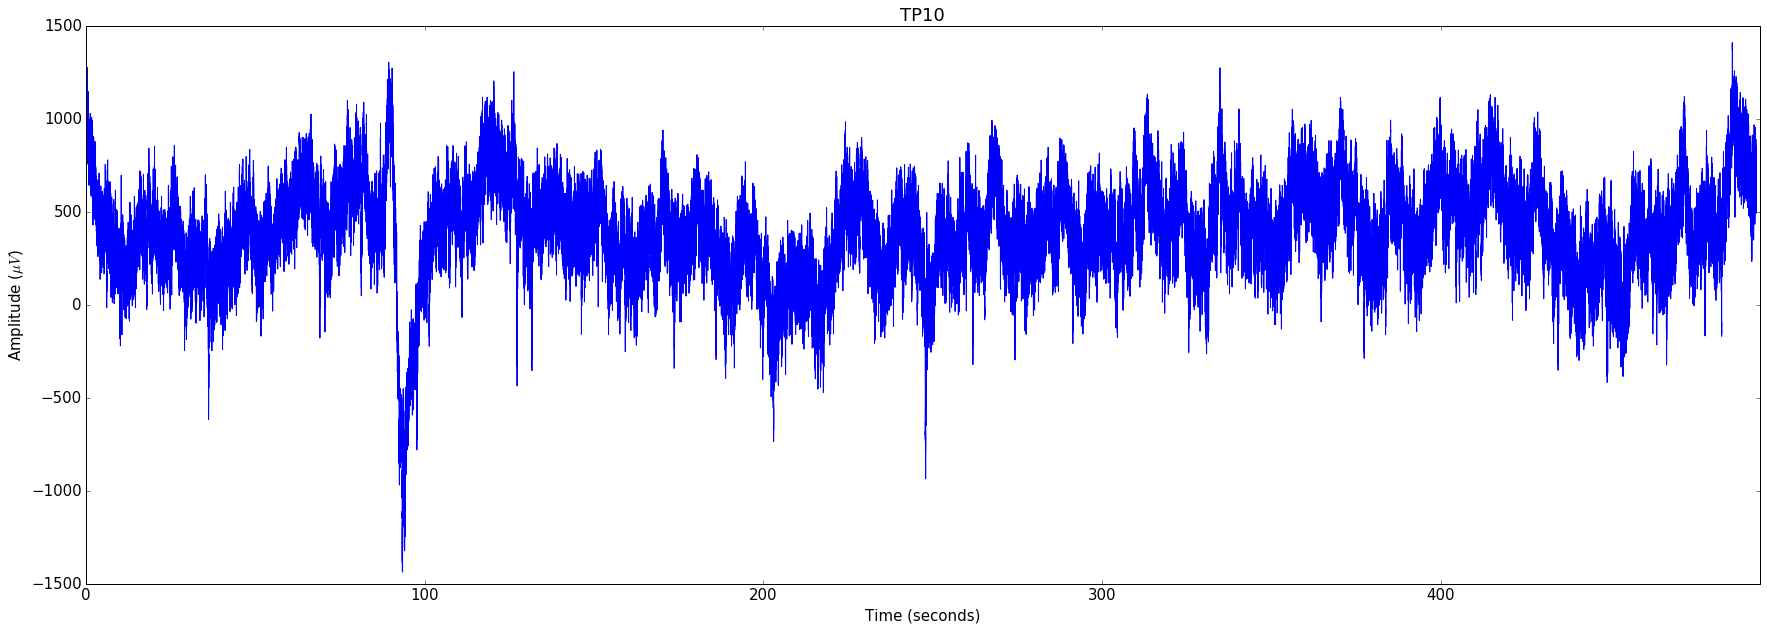

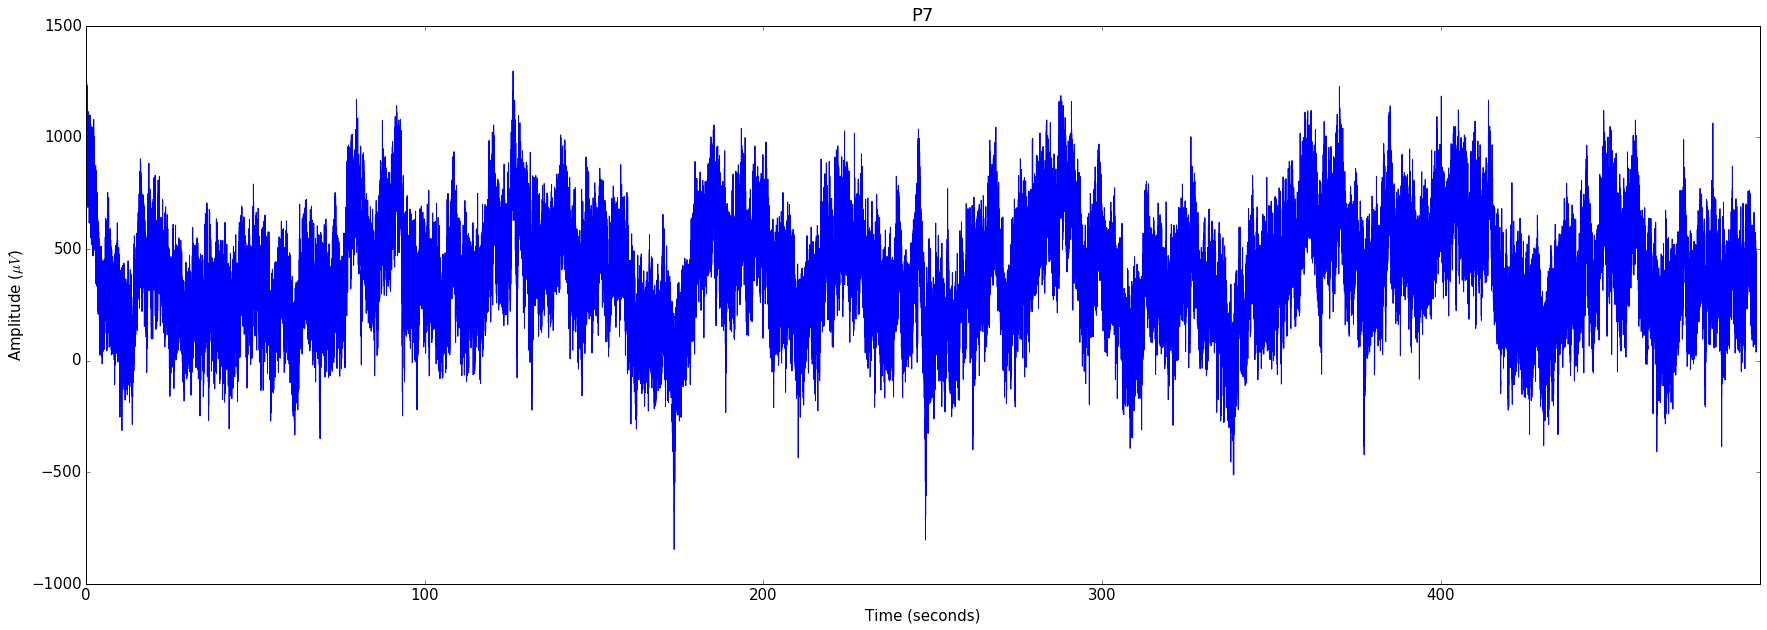

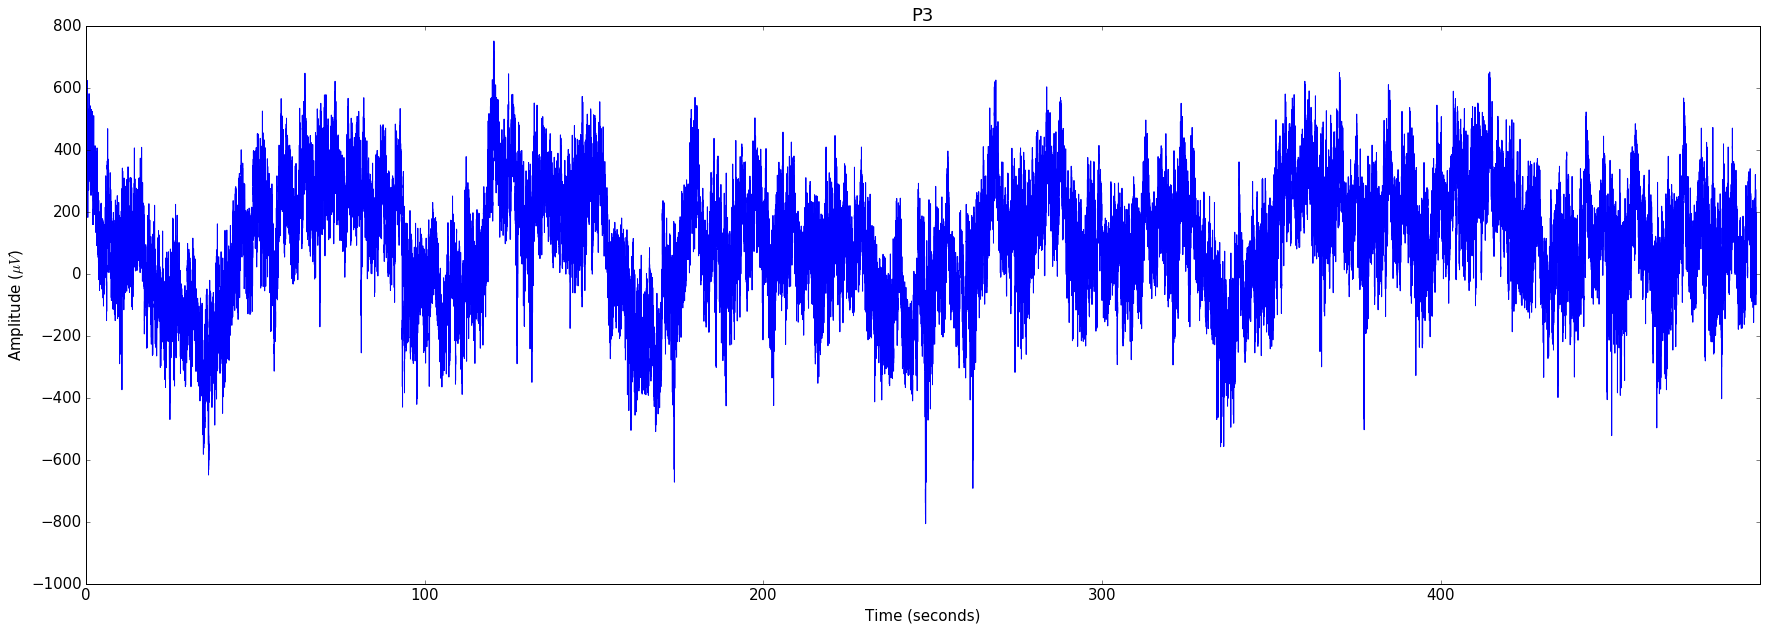

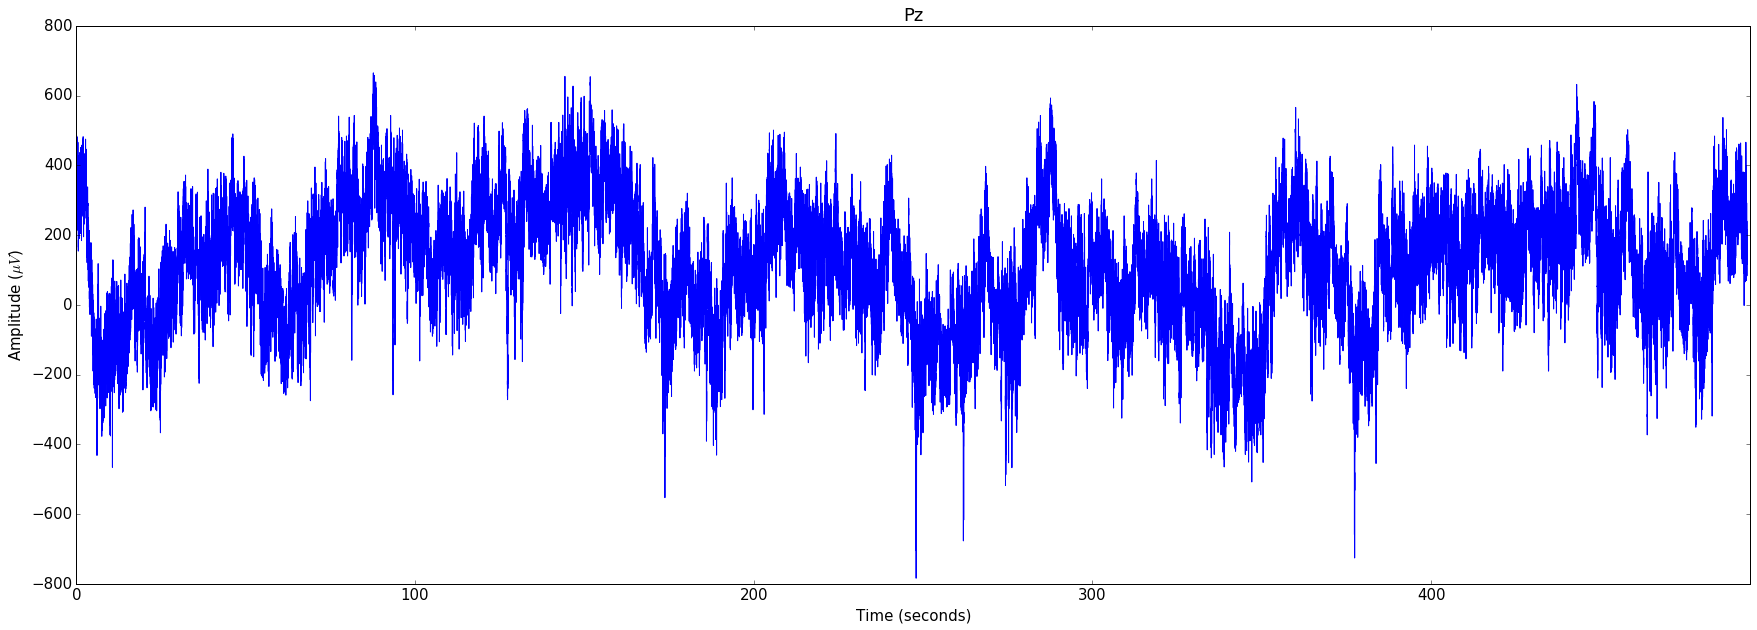

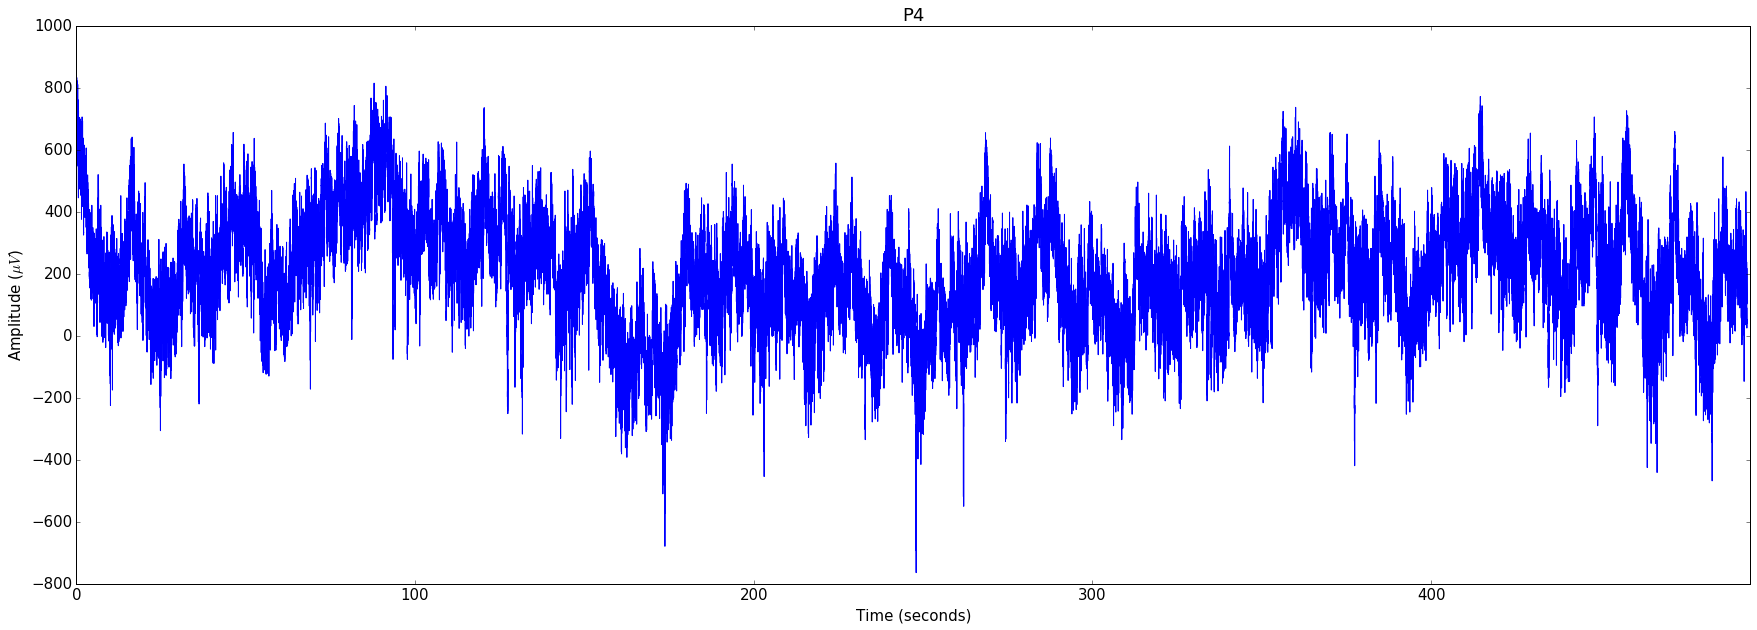

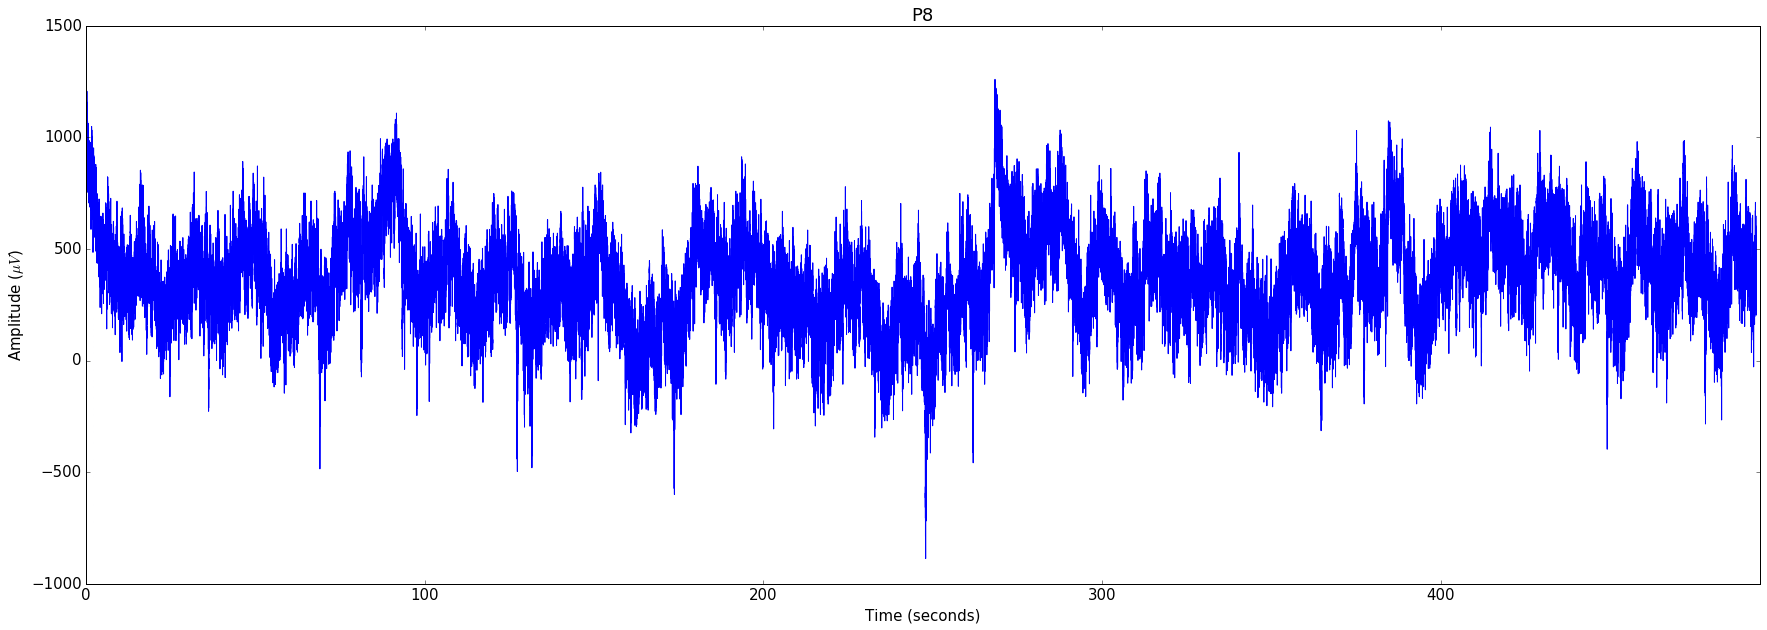

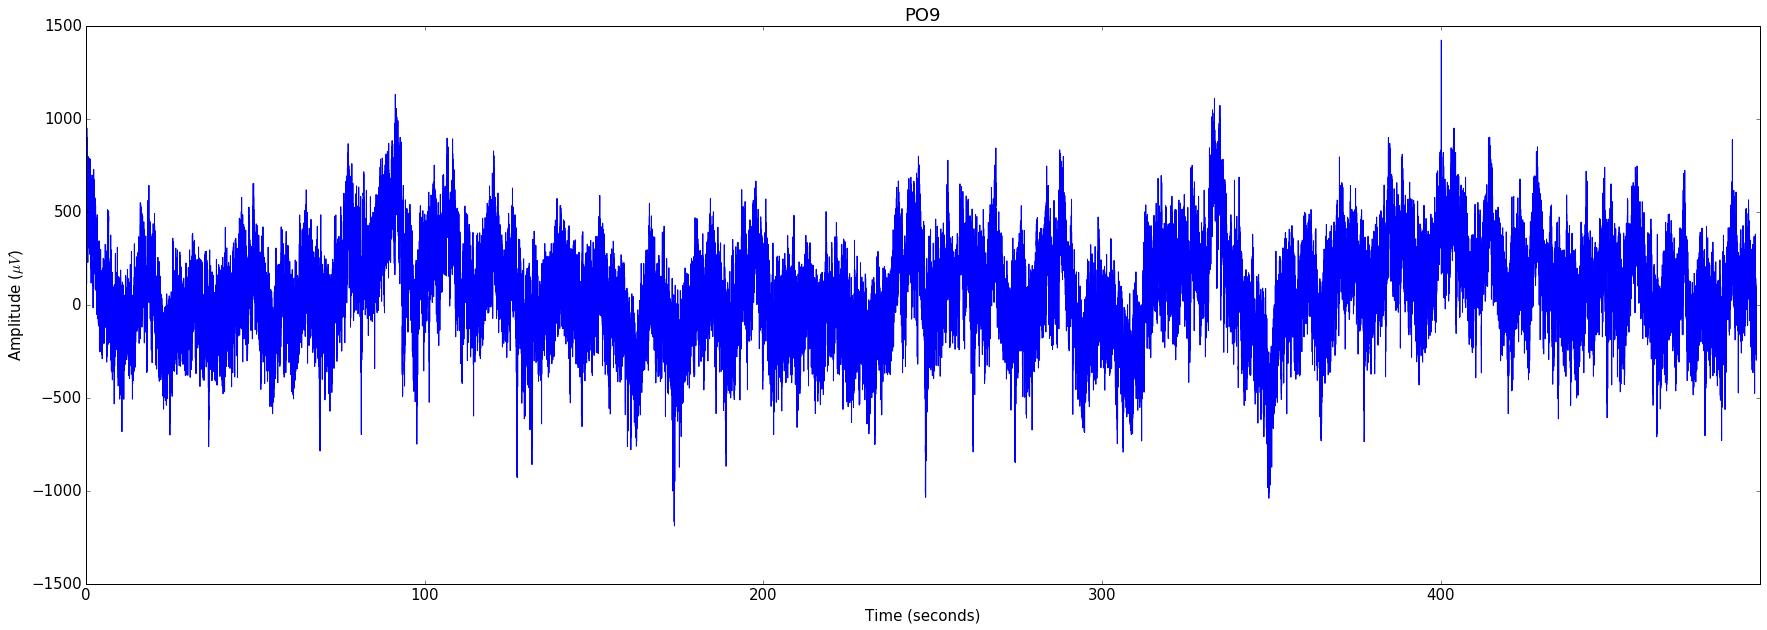

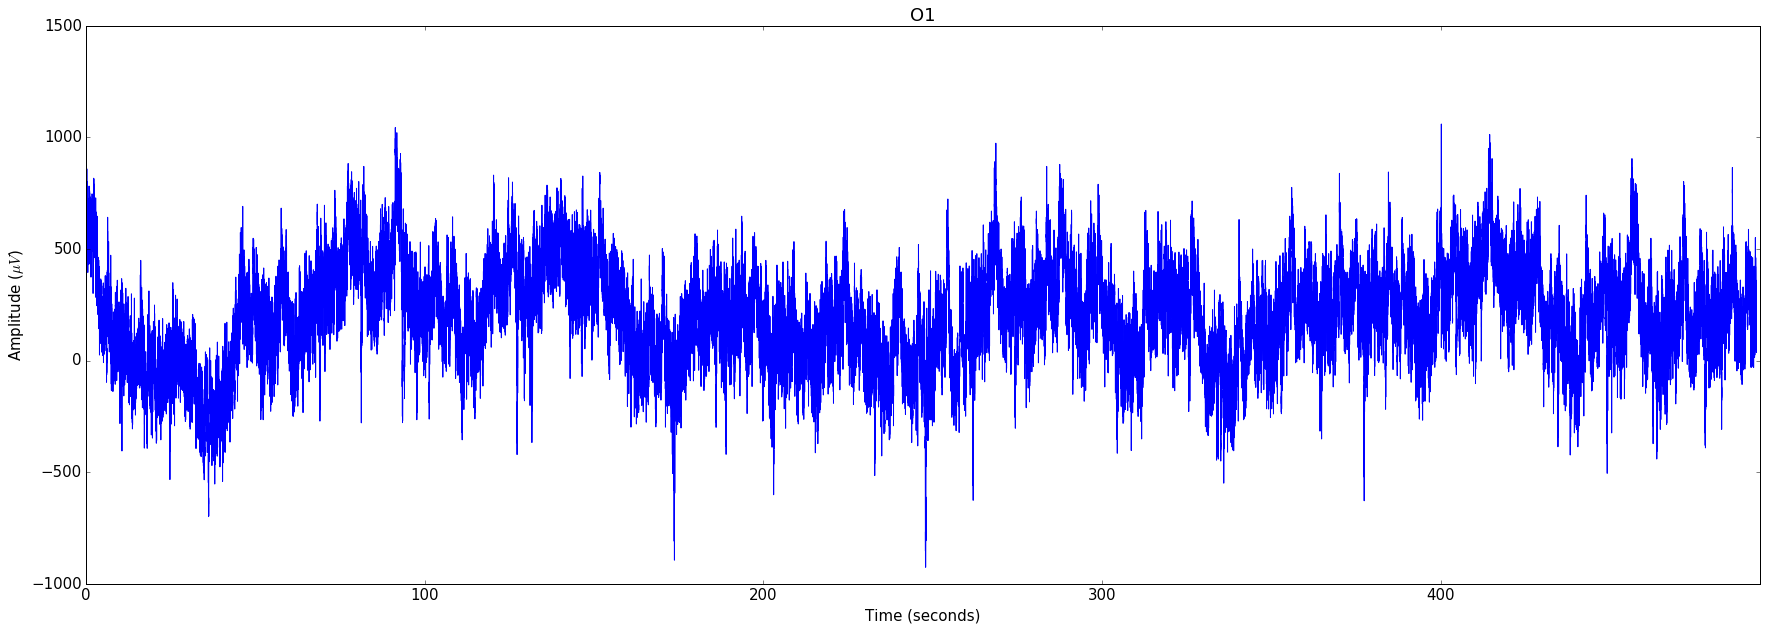

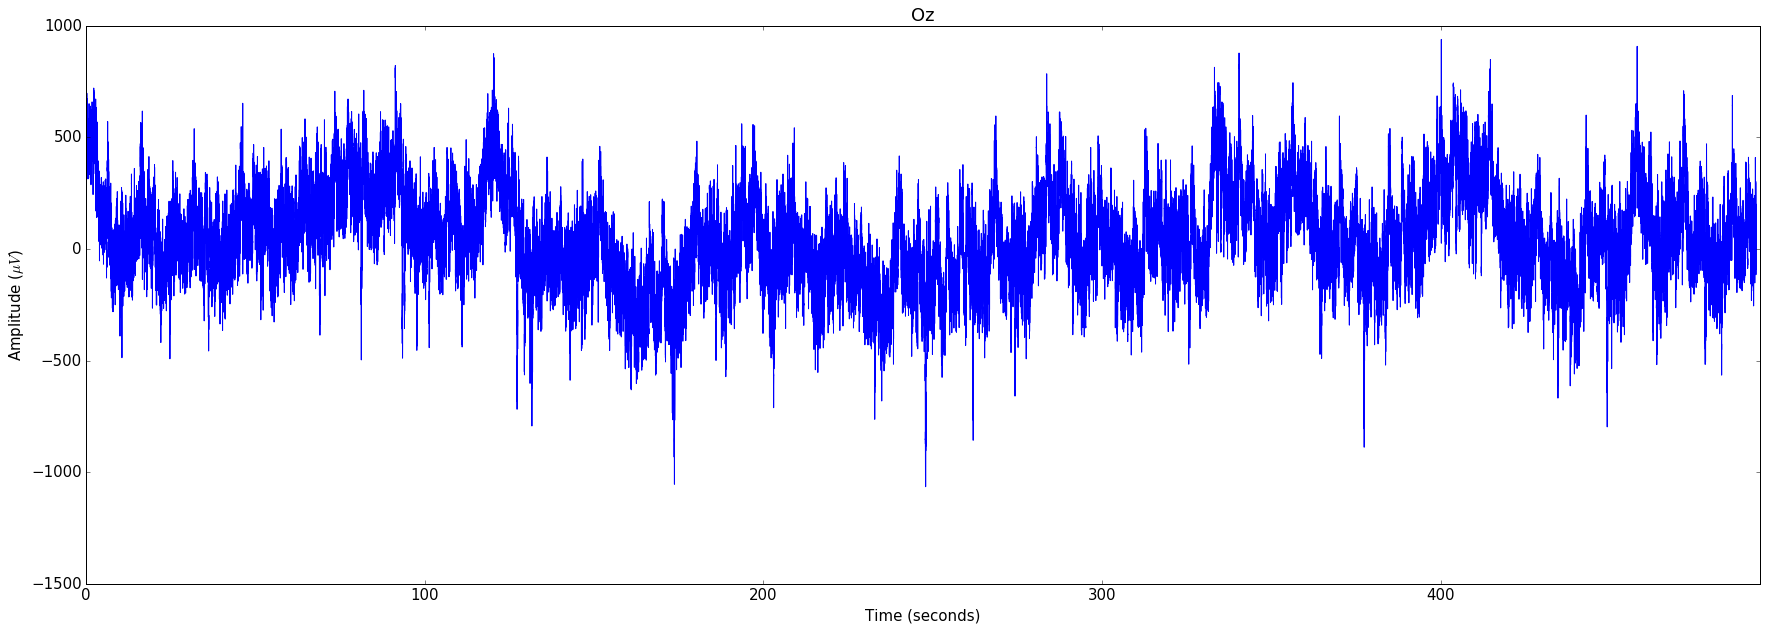

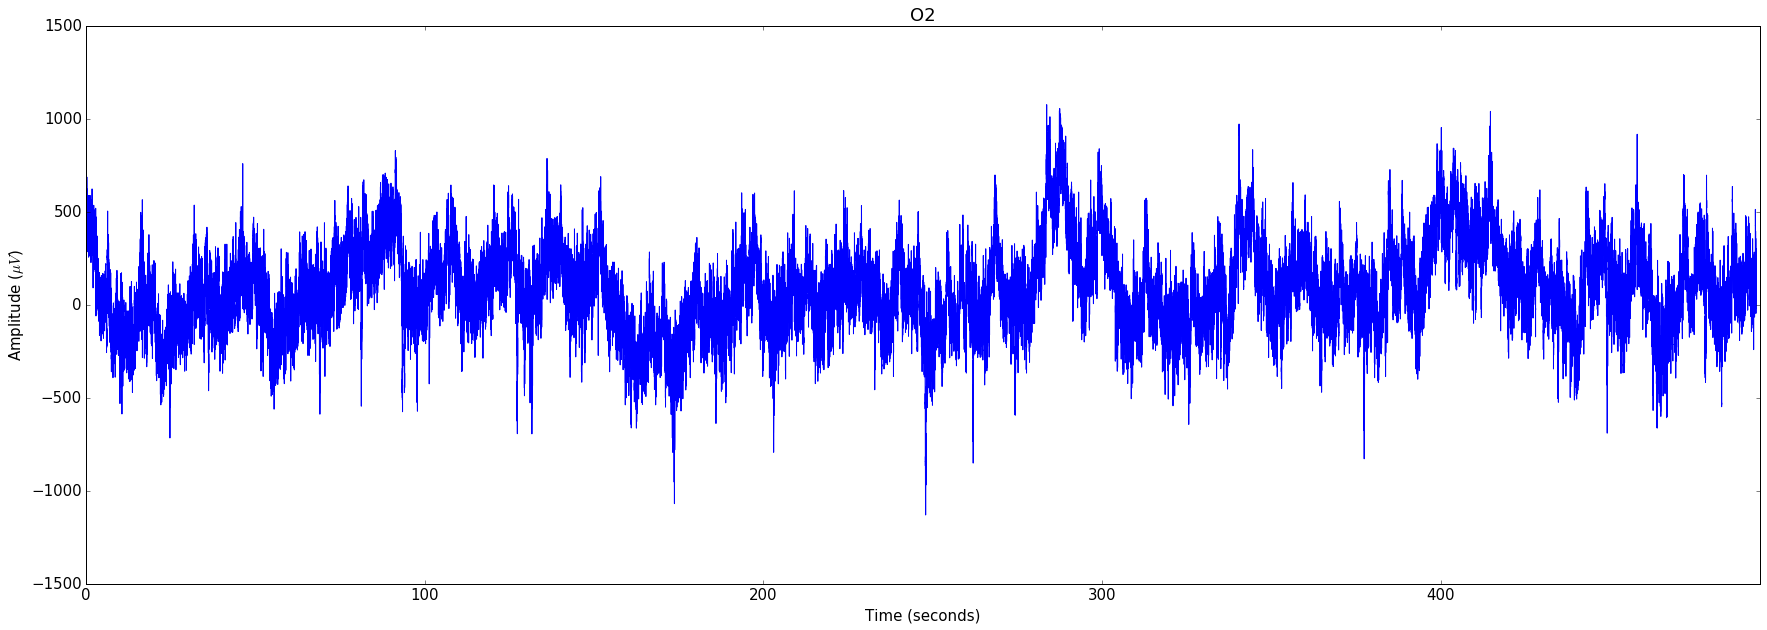

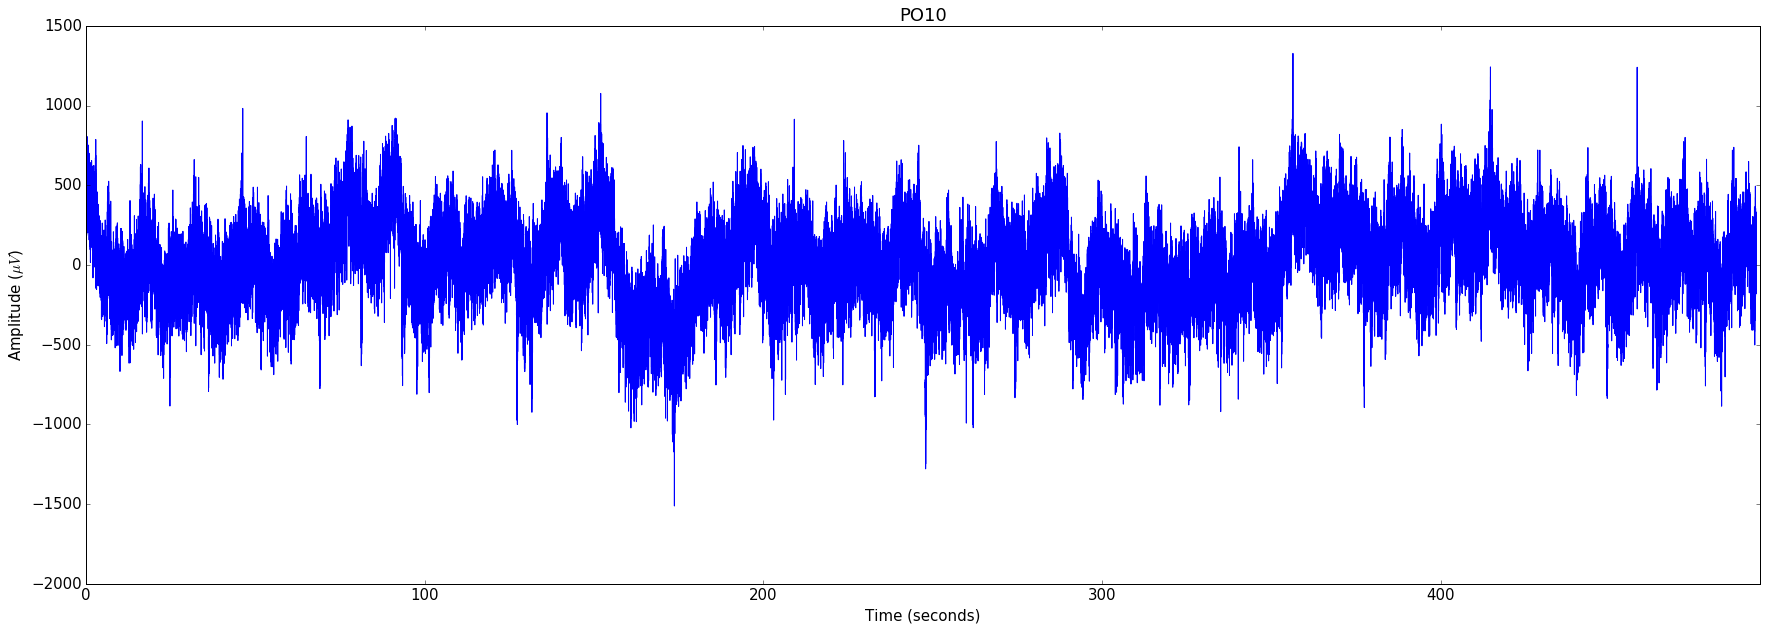

In [20]:
#let's look at the time series of all the plots
for col in series.columns:
    fig = plt.gcf()
    fig.set_size_inches((30, 10))
    #plt.plot(x_axis[:10000], series[col].values[:10000])
    plt.plot(x_axis, series[col].values)
    plt.xlabel('Time (seconds)')
    plt.ylabel(r'Amplitude ($\mu V$)')
    plt.xlim(0, x_axis[-1] + 1)
    #plt.xlim(0)
    plt.title(col)
    plt.show()
    plt.close()


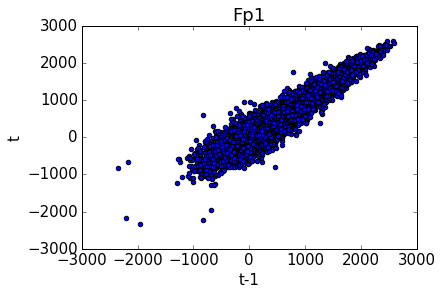

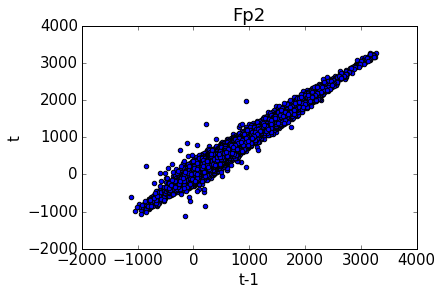

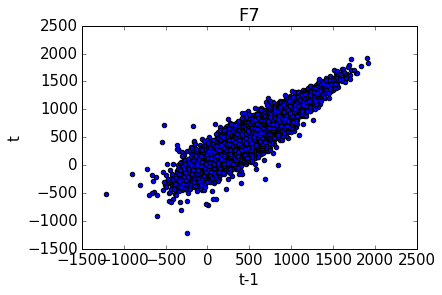

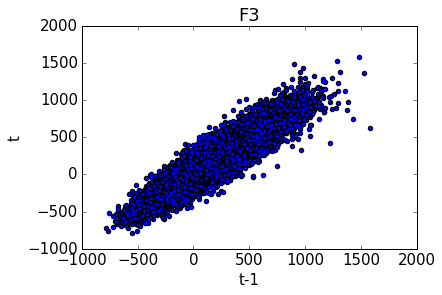

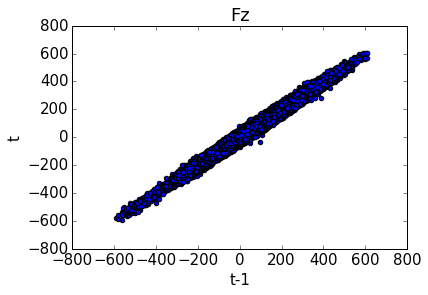

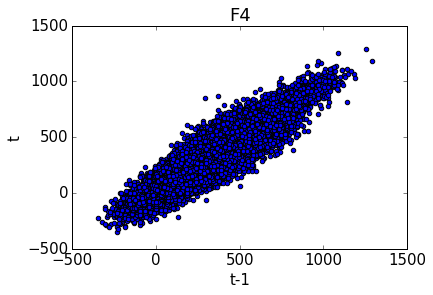

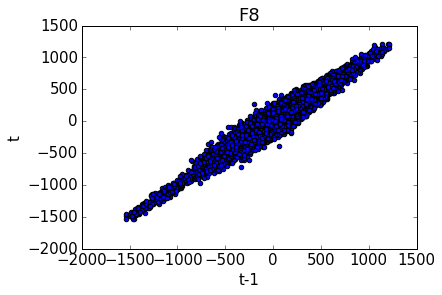

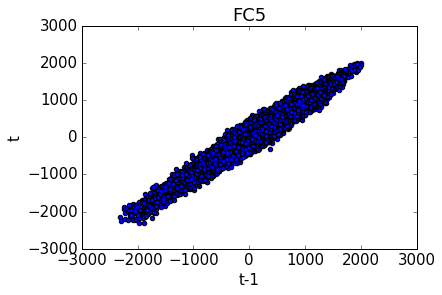

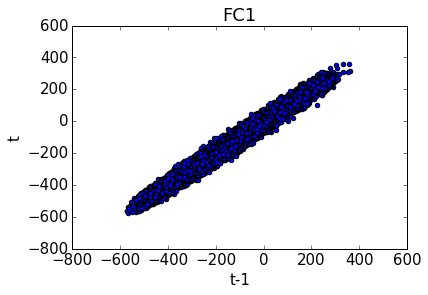

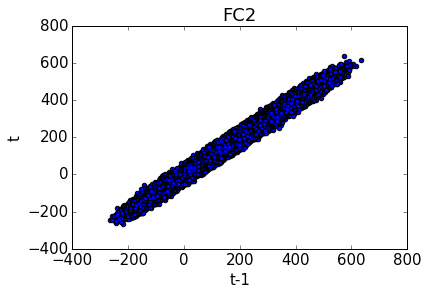

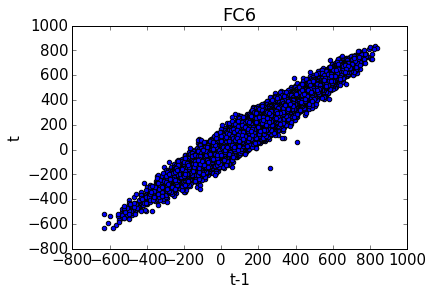

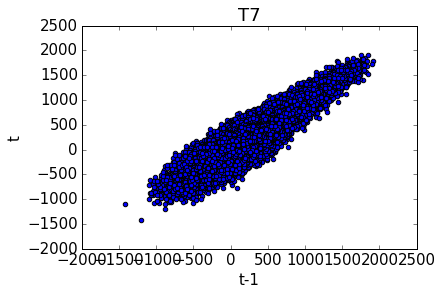

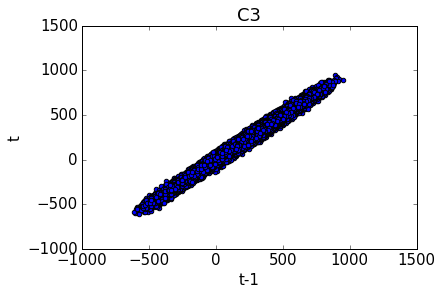

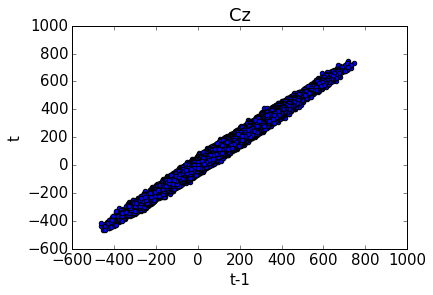

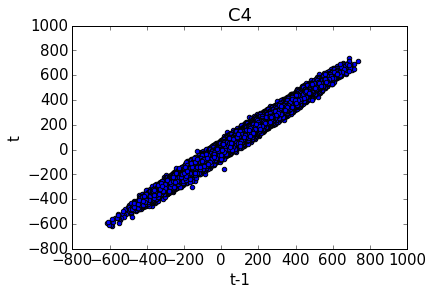

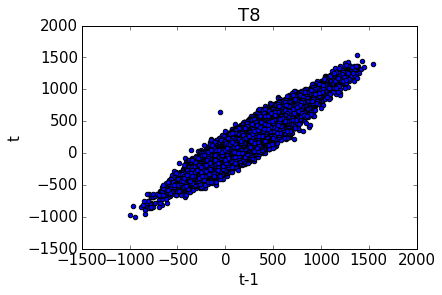

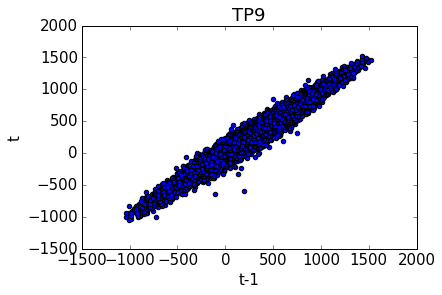

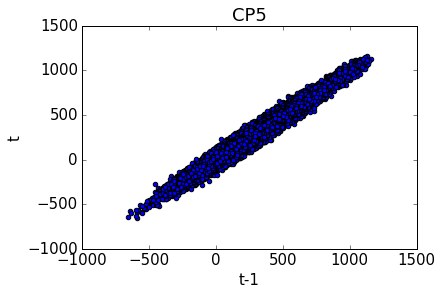

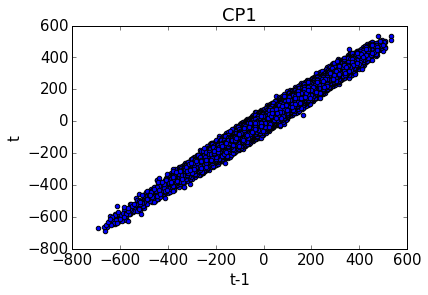

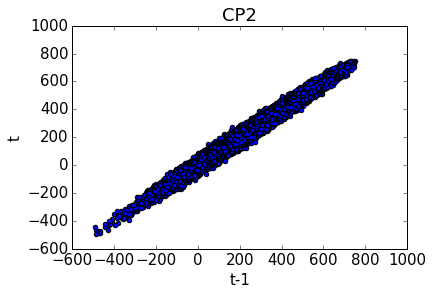

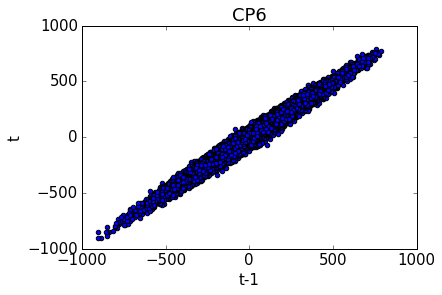

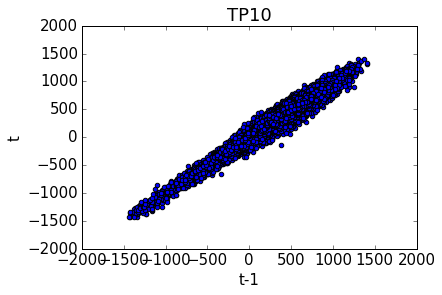

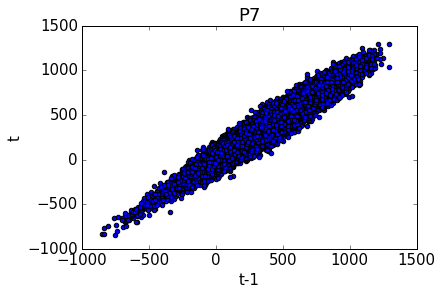

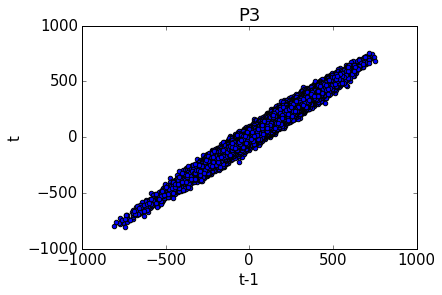

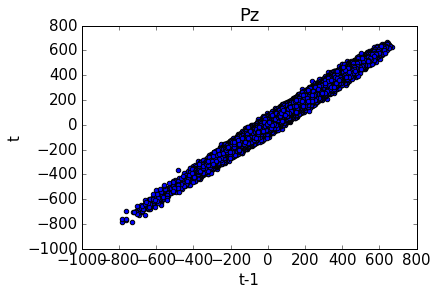

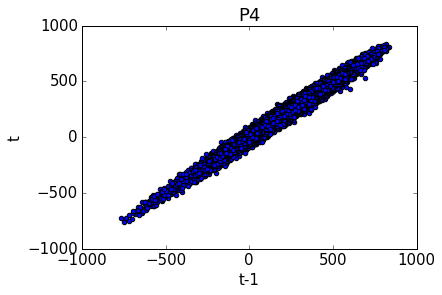

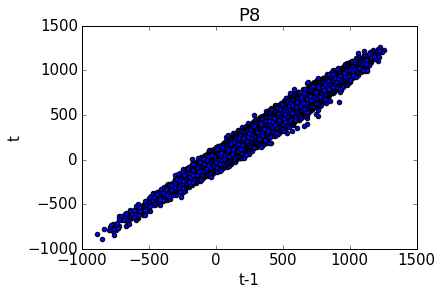

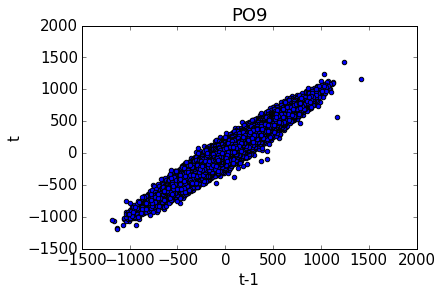

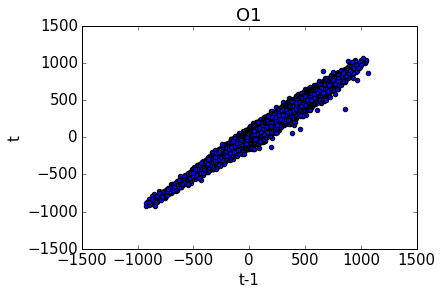

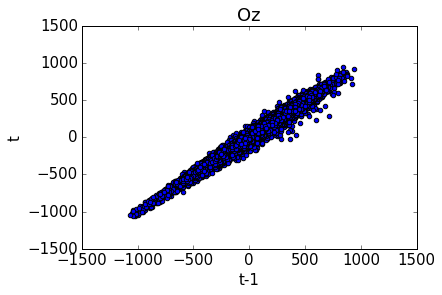

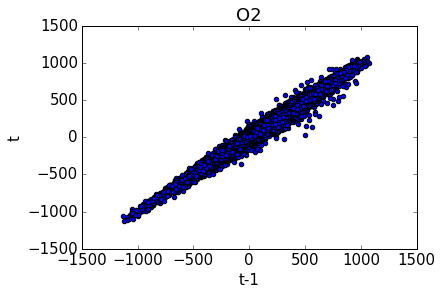

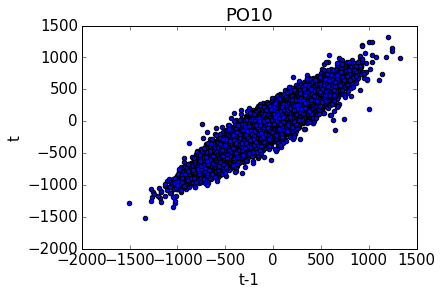

In [21]:
# autocorrelation plots
for col in series.columns:
    col_values = series[col].values
    plt.scatter(col_values[:-1], col_values[1:])
    plt.xlabel('t-1')
    plt.ylabel(r't')
    plt.title(col)
    plt.show()
    plt.close()

In [22]:
for i in range(series.shape[1]):
    print (np.corrcoef(series.values[1:, i], series.values[:-1, i])[0, 1])

0.949020956493
0.977813544887
0.949106560796
0.949400771285
0.991971823017
0.925067089908
0.975085858937
0.973404302917
0.98939347436
0.993622880838
0.977623818225
0.917881749857
0.99292362685
0.992415450985
0.99328412193
0.939637520854
0.975714294786
0.986513818329
0.988484724046
0.9896859958
0.986388123779
0.973585187098
0.968223259901
0.987878138223
0.991320935782
0.989778779823
0.982115563643
0.967217460854
0.987746155244
0.988168500502
0.989136019515
0.945605566374


In [23]:
covariance = np.cov(series.values.T)
corr = np.corrcoef(series.values.T)


for i in list(corr):
    print(i)

[  1.00000000e+00   7.09323942e-01   4.97598620e-01   2.77443991e-01
   3.18510685e-01   3.79966777e-01   2.34793747e-01   6.60235001e-02
   1.55711475e-01   2.26061388e-01   1.38006138e-01   1.16514521e-01
   3.58843360e-02   6.39264440e-02  -5.91885882e-02  -8.43925838e-02
   3.59468092e-03   1.22240969e-01  -9.08346053e-03  -5.94124446e-02
  -4.68451889e-02   6.19662724e-02   8.07144327e-04   7.17012859e-02
  -1.53546147e-01  -9.28324381e-02  -9.59211869e-02  -5.75045206e-02
  -3.79902701e-02  -7.00356458e-02  -1.09695525e-01  -5.91165031e-02]
[ 0.70932394  1.          0.44190936  0.32558772  0.36695011  0.48503239
  0.39087056  0.07605113  0.18746255  0.24353255  0.18327332  0.08610557
  0.11672107  0.07315945  0.06211875  0.00987502  0.037225    0.03529179
  0.03758682 -0.01085114  0.00299966  0.10704302 -0.03724019 -0.00756592
 -0.20196673 -0.02250109 -0.06134402 -0.08544307 -0.11083851  0.00686313
 -0.04744464 -0.06846913]
[ 0.49759862  0.44190936  1.          0.21331383  0.3779

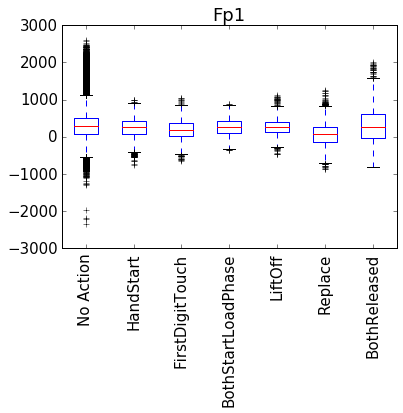

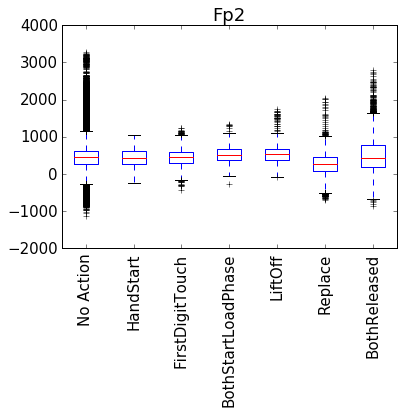

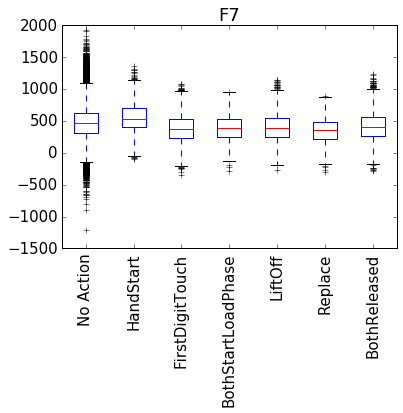

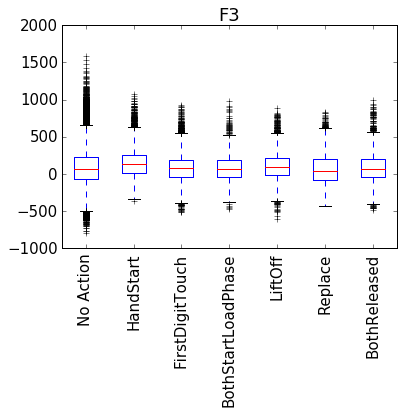

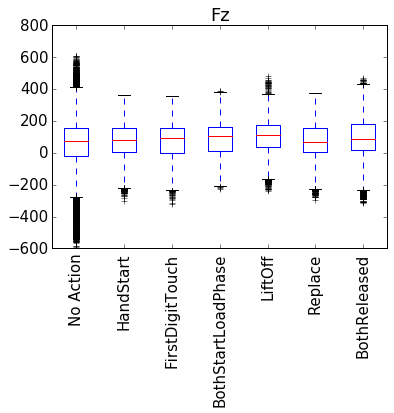

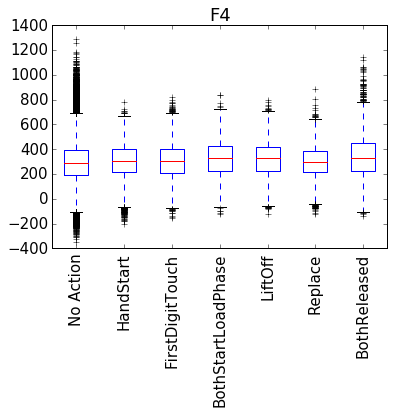

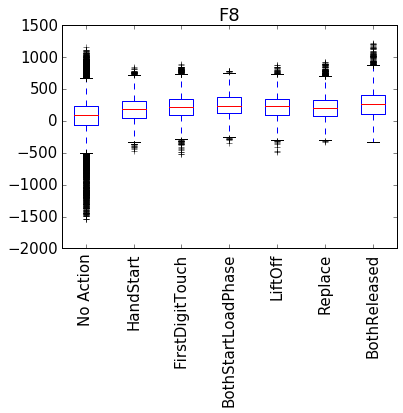

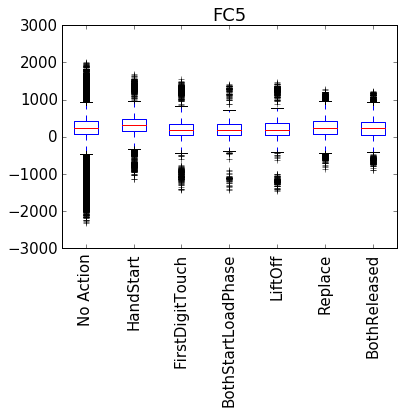

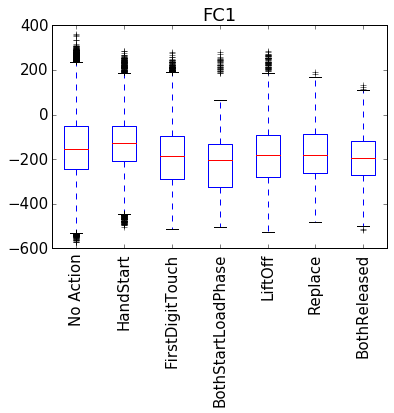

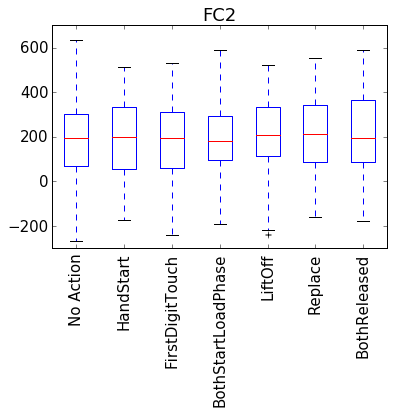

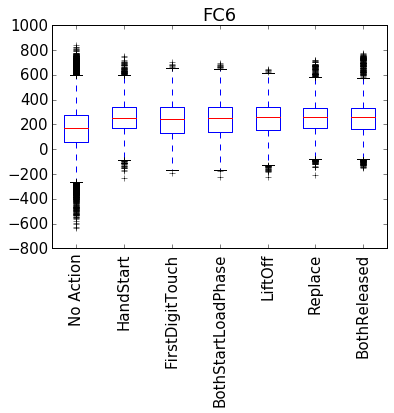

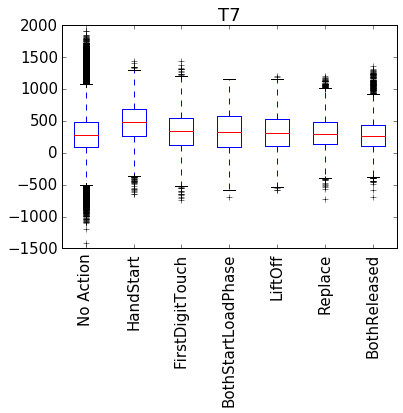

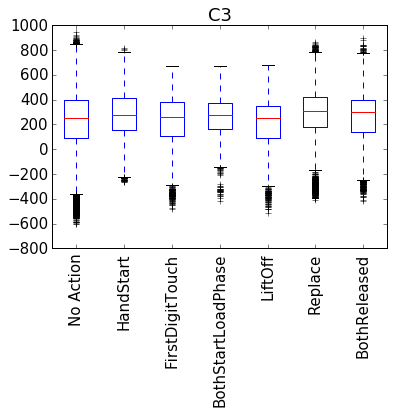

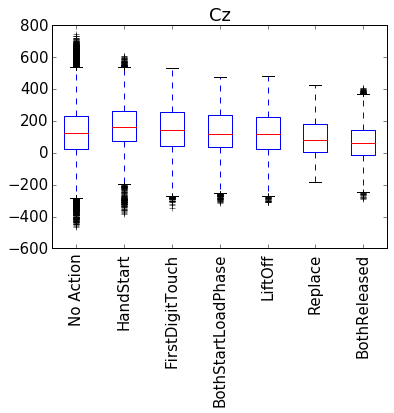

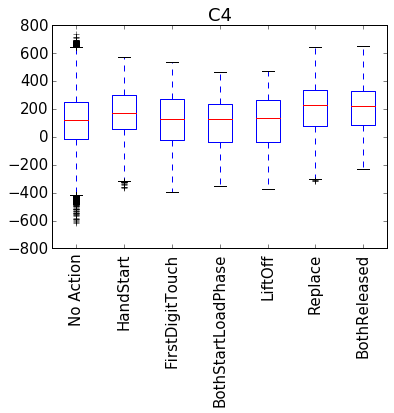

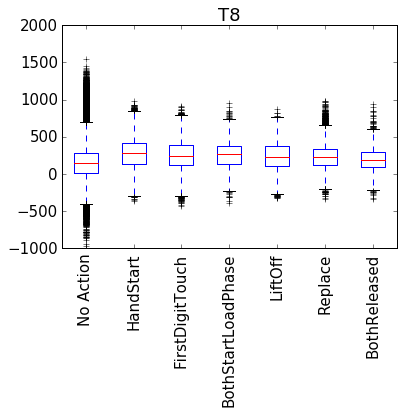

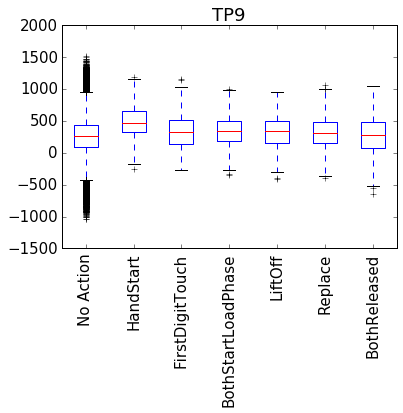

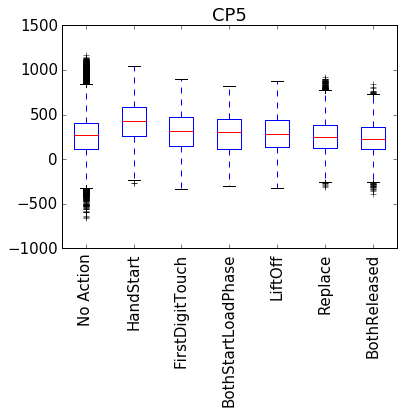

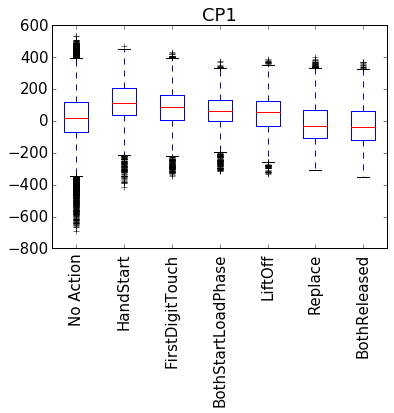

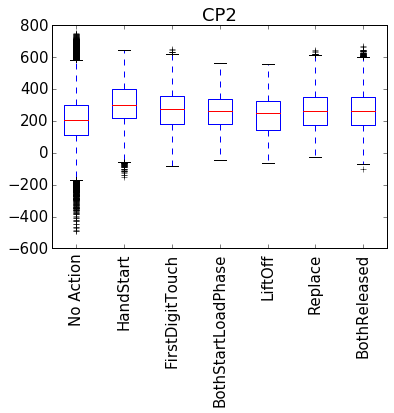

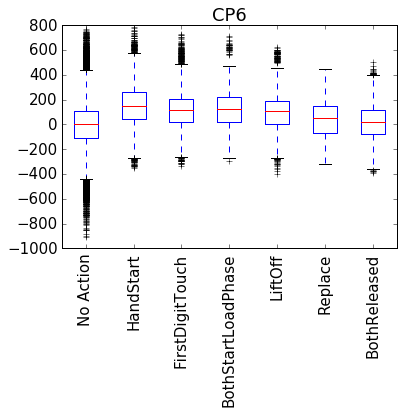

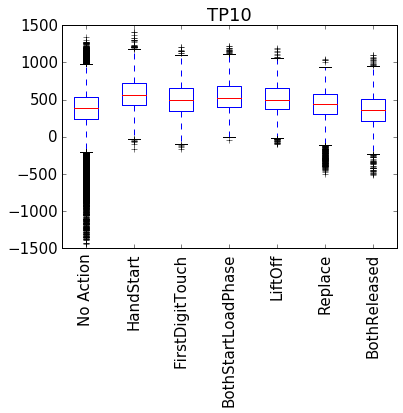

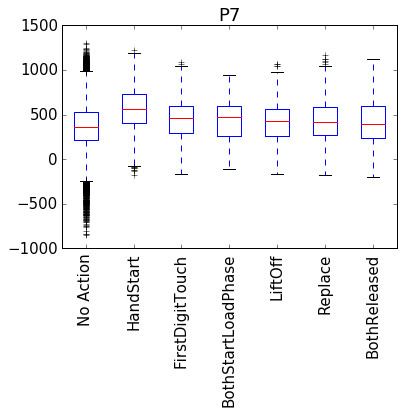

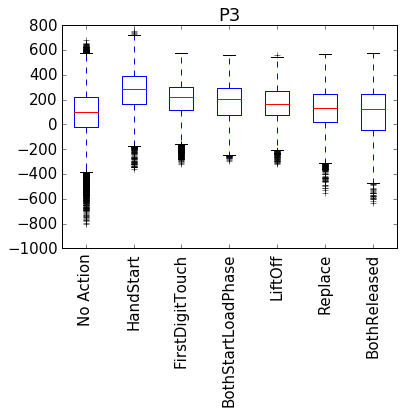

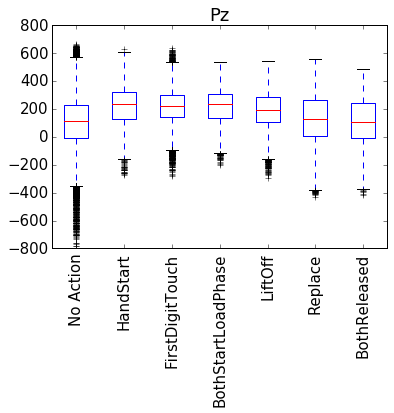

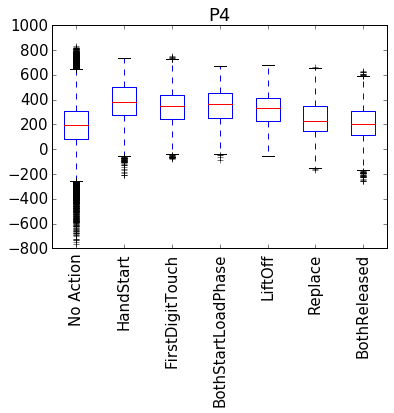

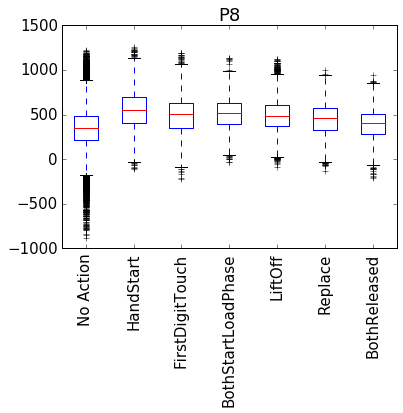

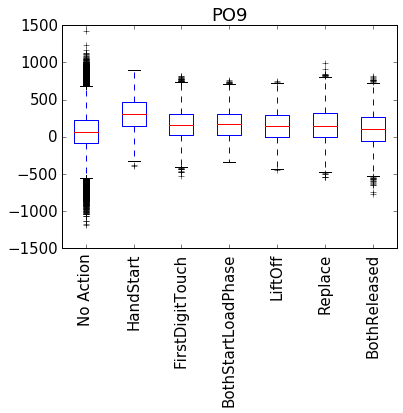

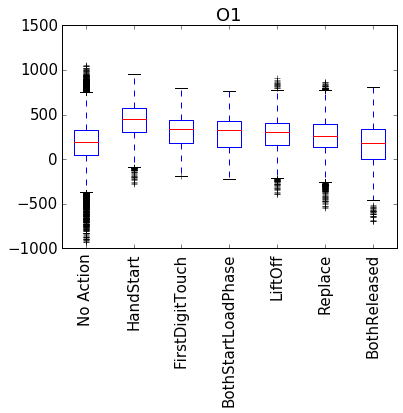

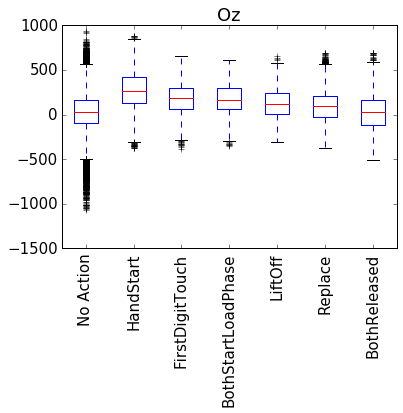

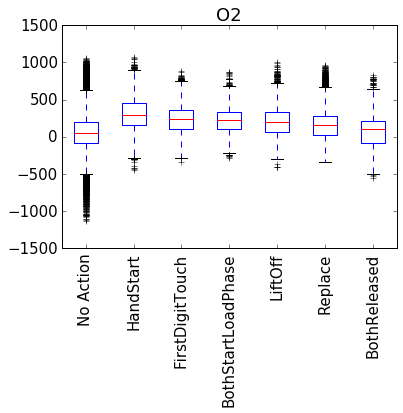

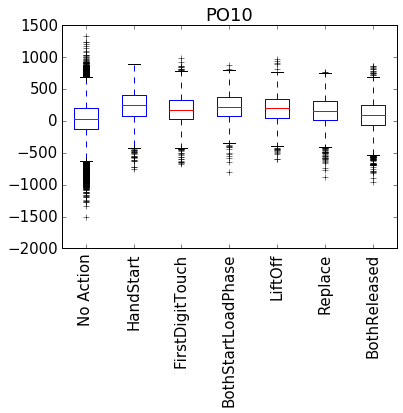

In [24]:
# distribution of the columns in the data split by features
num_classes = 7 # 6 activities plus no activity

for feature in series.columns:
    feature_by_label = []
    for i in range(num_classes):
        # for each class label, get the rows where the class happened
        indexes = np.where(labels == i)[0]
        feature_by_label.append(series[feature].values[indexes])
    plt.boxplot(feature_by_label)
    plt.title(feature)
    plt.xticks(locations[1:], names[:-1], rotation='vertical')
    plt.show()
    plt.close()

In [25]:
#logistic regression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

X = series.values
lr.fit(X, labels)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [26]:
# lr.predict_proba gives a probability for each class
y_prob = lr.predict_proba(X)
y_prob



array([[  9.85624461e-01,   3.42460199e-03,   2.32068360e-04, ...,
          1.77498046e-04,   9.10313005e-03,   1.39921901e-03],
       [  9.89730476e-01,   2.39640121e-03,   2.36419959e-04, ...,
          1.36904130e-04,   6.31594798e-03,   1.14169213e-03],
       [  9.90540901e-01,   3.32965439e-03,   1.83681230e-04, ...,
          7.96992957e-05,   4.87906227e-03,   9.58290328e-04],
       ..., 
       [  9.73471370e-01,   3.27061218e-03,   8.08856770e-03, ...,
          9.94937077e-03,   1.25344427e-03,   5.30841215e-04],
       [  9.73727404e-01,   4.41418547e-03,   8.09253456e-03, ...,
          7.94090161e-03,   1.21023279e-03,   5.73718294e-04],
       [  9.75788533e-01,   3.25581744e-03,   7.73718520e-03, ...,
          6.37243500e-03,   5.51789787e-04,   9.43460349e-04]])

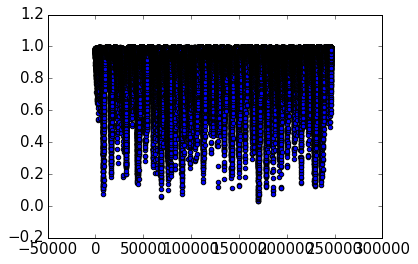

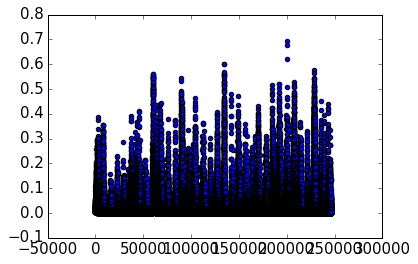

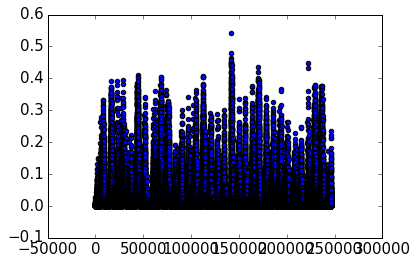

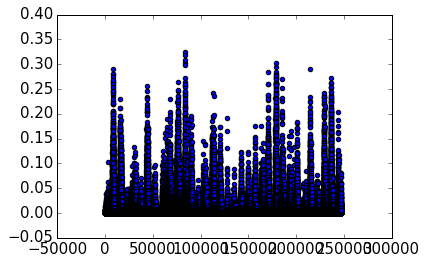

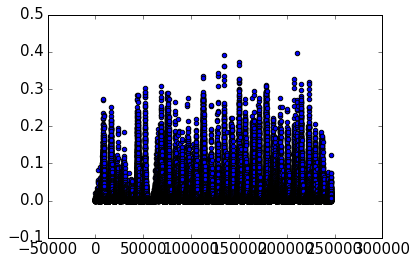

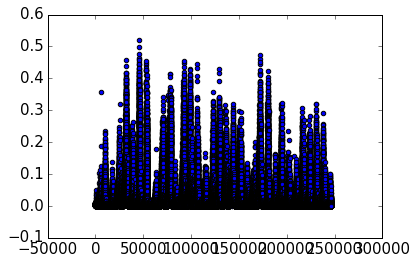

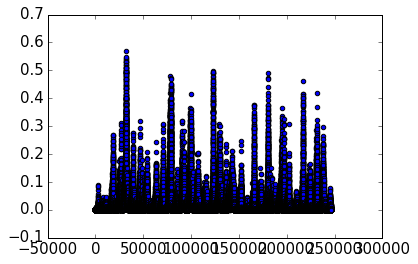

In [27]:
for i in range(num_classes):
    plt.scatter(np.arange(len(X)), y_prob[:, i])
    plt.show()
    plt.close()


In [29]:
from sklearn.metrics import roc_auc_score 
for i in range(num_classes):
    y_true = (1 * (labels == i))
    print(names[i], ": ", roc_auc_score(y_true, y_prob[:, i]), sep='')


No Action: 0.839185864203
HandStart: 0.882636238511
FirstDigitTouch: 0.908261530787
BothStartLoadPhase: 0.936298793488
LiftOff: 0.909287843887
Replace: 0.902001085157
BothReleased: 0.904531383935


In [30]:
def extract_features(ts):
    """
    ts is the time series of labels as a numpy array
    """
    last_state = 0
    last_state_nz = 6
    time_since_last_nz = 2
    duration_of_cur_state = 1
    X = []
    for i in range(len(ts)):
        cur_state = ts[i]
        X.append([last_state, last_state_nz, time_since_last_nz, duration_of_cur_state])
        
        if last_state == cur_state:
            duration_of_cur_state += 1
        else:
            duration_of_cur_state = 0
        if cur_state != 0:
            last_state_nz = cur_state
            time_since_last_nz = 1
        else:
            time_since_last_nz += 1
        last_state = cur_state
    X = np.array(X)
    return X

X = extract_features(labels)

lr = LogisticRegression()
lr.fit(X, labels)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

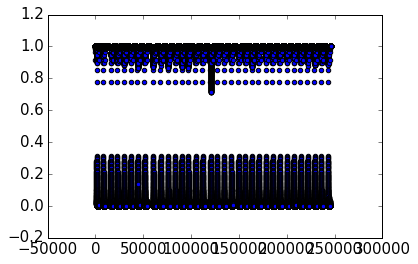

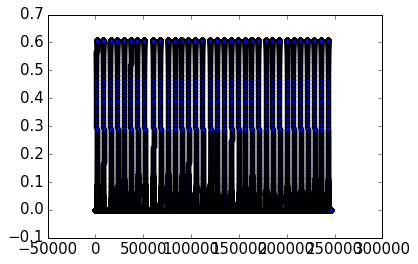

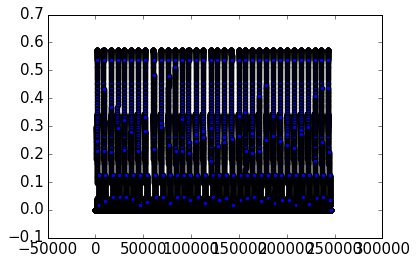

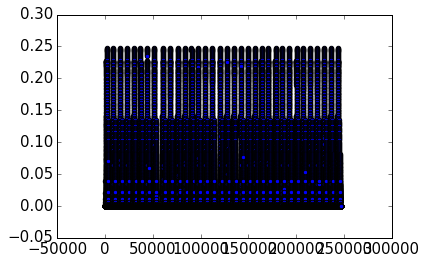

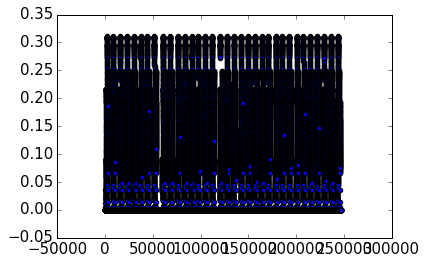

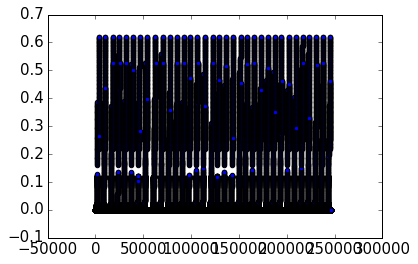

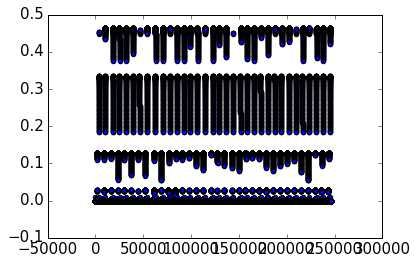

In [31]:
y_prob = lr.predict_proba(X)

for i in range(num_classes):
    plt.scatter(np.arange(len(X)), y_prob[:, i])
    plt.show()
    plt.close()

In [32]:
from sklearn.metrics import roc_auc_score

for i in range(num_classes):
    y_true = (1 * (labels == i))
    print(names[i], ": ", roc_auc_score(y_true, y_prob[:, i]), sep='')

No Action: 0.998784049892
HandStart: 0.997253456817
FirstDigitTouch: 0.996432218445
BothStartLoadPhase: 0.990648207323
LiftOff: 0.991438814009
Replace: 0.990371779927
BothReleased: 0.998092627332


In [33]:
from sklearn.metrics import precision_recall_fscore_support
y_true = labels
y_pred = np.argmax(y_prob, axis=1)
prec, rec, fscore, supp = precision_recall_fscore_support(y_true, y_pred)
print ("Precision:", ["%.3f" % i for i in prec])
print ("Recall:", ["%.3f" % i for i in rec])
print ("F-1 Score:", ["%.3f" % i for i in fscore])


Precision: ['0.998', '0.993', '0.883', '0.000', '0.573', '0.581', '0.679']
Recall: ['0.999', '0.993', '0.940', '0.000', '0.437', '0.740', '0.741']
F-1 Score: ['0.999', '0.993', '0.911', '0.000', '0.496', '0.651', '0.709']


/Users/xpandachuy/anaconda/lib/python3.5/site-packages/sklearn/metrics/classification.py:1074: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
